# MATH1042 Peluang dan Statistika - Regresi Linear Sederhana

<b>Kelompok 08</b>
<ol>
<li>Christopher Nathaniel Tanamas // 222200153</li>
<li>Grace Calista Lim // 222102176</li>
<li>Jemima Alithia Sigar // 222101393</li>
<li>Samuel Revaldo Tjahyadi // 222102304</li>
</ol>

## Importing Libraries

In [391]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Importing Dataset

In [392]:
df = pd.read_csv("Life Expectancy Data.csv")
display(df.head(10))

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [393]:
print(df.columns) # Memeriksa semua nama kolom

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [394]:
df.info()   # Memeriksa kelengkapan data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [395]:
df.describe()   # Memeriksa statistik data

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

## Pre-processing
Mengganti semua data null pada tiap atribut dengan nilai rata-rata atribut tersebut.

In [396]:
mean_values = df.mean(numeric_only=True)     # Mendapatkan nilai rataan dari tiap atribut
print(mean_values)  # Memeriksa mean values

Year                               2.007519e+03
Life expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
infant deaths                      3.030395e+01
Alcohol                            4.602861e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.094046e+01
Measles                            2.419592e+03
 BMI                               3.832125e+01
under-five deaths                  4.203574e+01
Polio                              8.255019e+01
Total expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
 HIV/AIDS                          1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
 thinness  1-19 years              4.839704e+00
 thinness 5-9 years                4.870317e+00
Income composition of resources    6.275511e-01
Schooling                          1.199279e+01
dtype: float64


In [397]:
df = df.dropna() # Menghapus sel kosong

In [398]:
df.info()   # Memeriksa data kembali

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [399]:
# Mengkonversi nilai-nilai 0 menjadi 0.00000001 agar dapat dilakukan transformasi tertentu (menggunakan nilai estimasi yang mendekati)
def convert_value(value):
    if value == 0.000000 :
        return 0.00000001
    else:
        return float(value)

df['Alcohol'] = df['Alcohol'].apply(convert_value)
df['percentage expenditure'] = df['percentage expenditure'].apply(convert_value)
df[' BMI '] = df[' BMI '].apply(convert_value)
df['Hepatitis B'] = df['Hepatitis B'].apply(convert_value)

## Visualisasi Perbandingan Jumlah Negara

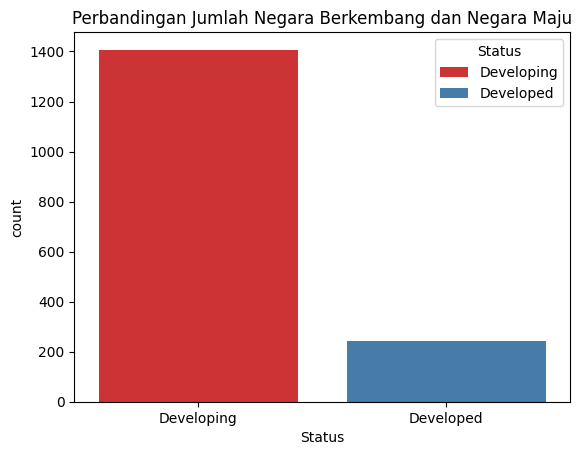

In [400]:
sns.countplot(data=df, x='Status', hue='Status', palette='Set1') #Visualisasi diagram batang
plt.title('Perbandingan Jumlah Negara Berkembang dan Negara Maju')
plt.legend(title='Status', labels=['Developing', 'Developed']) #Menambahkan legend
plt.show()

### Pembagian Berdasarkan Negara

In [401]:
developing_df = df[df['Status'] == 'Developing']
developed_df = df[df['Status'] == 'Developed']

## Visualisasi Data

### Fungsi Visualisasi Data

In [402]:
def raw_plot(axes, num, df, nama_x, label_x, title_x):
    sns.scatterplot(ax=axes[num], x=nama_x, y='Life expectancy ', data=df)
    axes[num].set_xlabel(label_x)
    axes[num].set_ylabel('Tingkat Harapan Hidup')
    axes[num].set_title(f'Hubungan Tingkat Harapan Hidup dengan {title_x}')
    axes[num].grid(alpha=0.5)

### Hubungan antara life expectacy dengan konsumsi alkohol per kapita

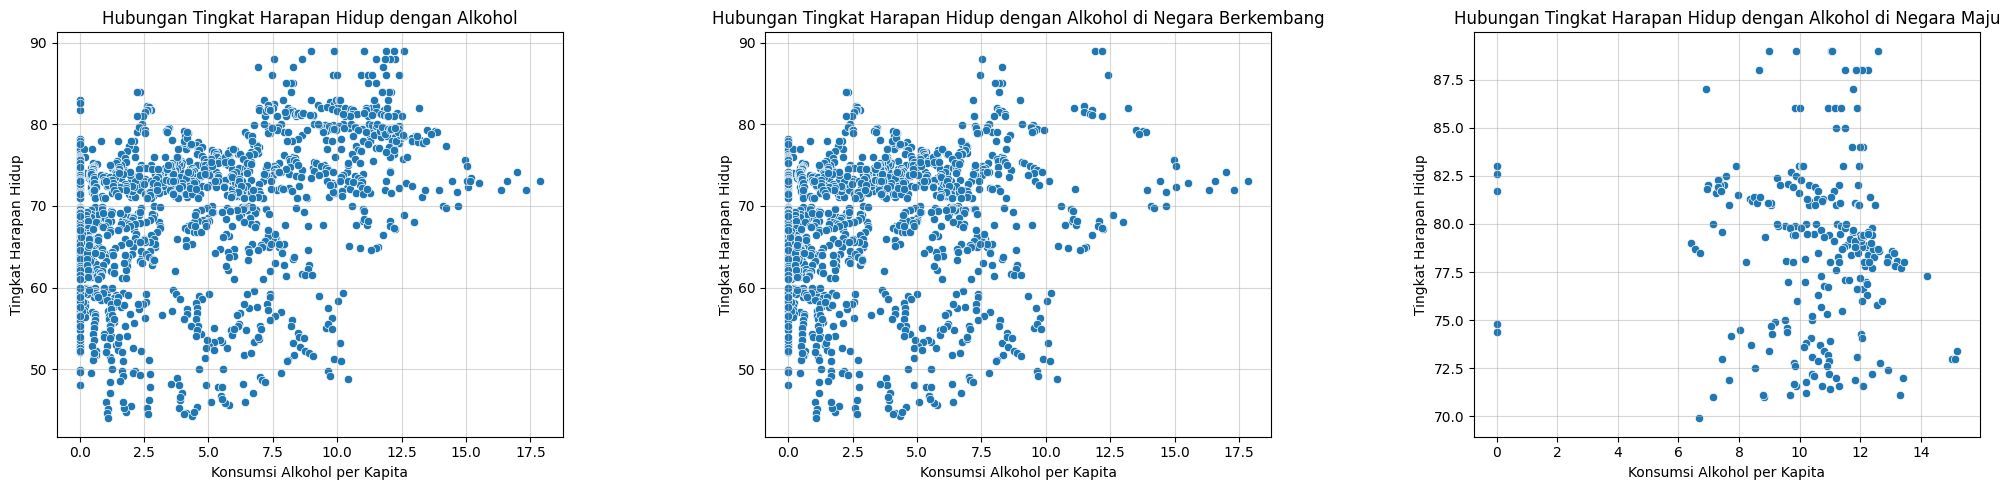

In [403]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Membandingkan data keseluruhan dengan data negara maju dan berkembang
raw_plot(axes, 0, df, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol')
raw_plot(axes, 1, developing_df, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol di Negara Berkembang')
raw_plot(axes, 2, developed_df, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol di Negara Maju')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

### Hubungan antara life expectacy dengan persentase belanja negara

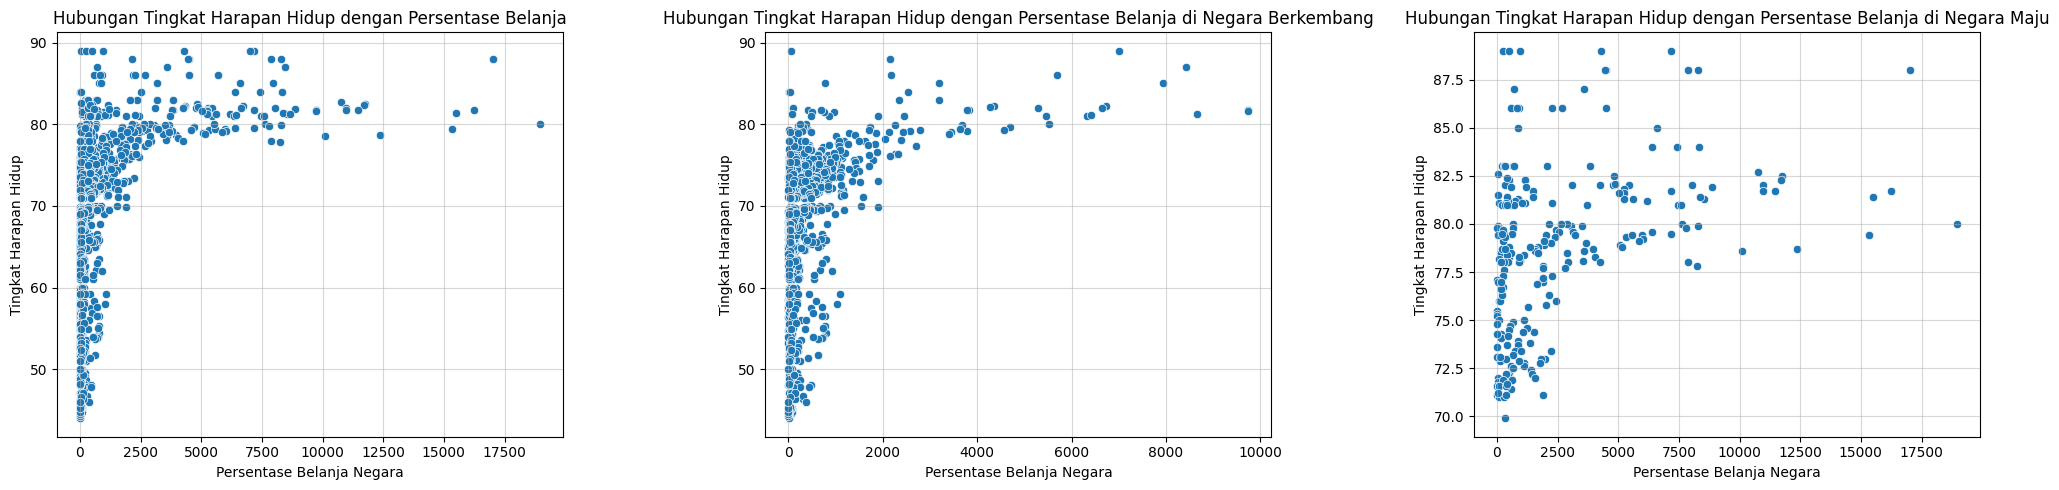

In [404]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Membandingkan data keseluruhan dengan data negara maju dan berkembang
raw_plot(axes, 0, df, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja')
raw_plot(axes, 1, developing_df, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja di Negara Berkembang')
raw_plot(axes, 2, developed_df, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja di Negara Maju')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

### Hubungan antara life expectacy dengan BMI

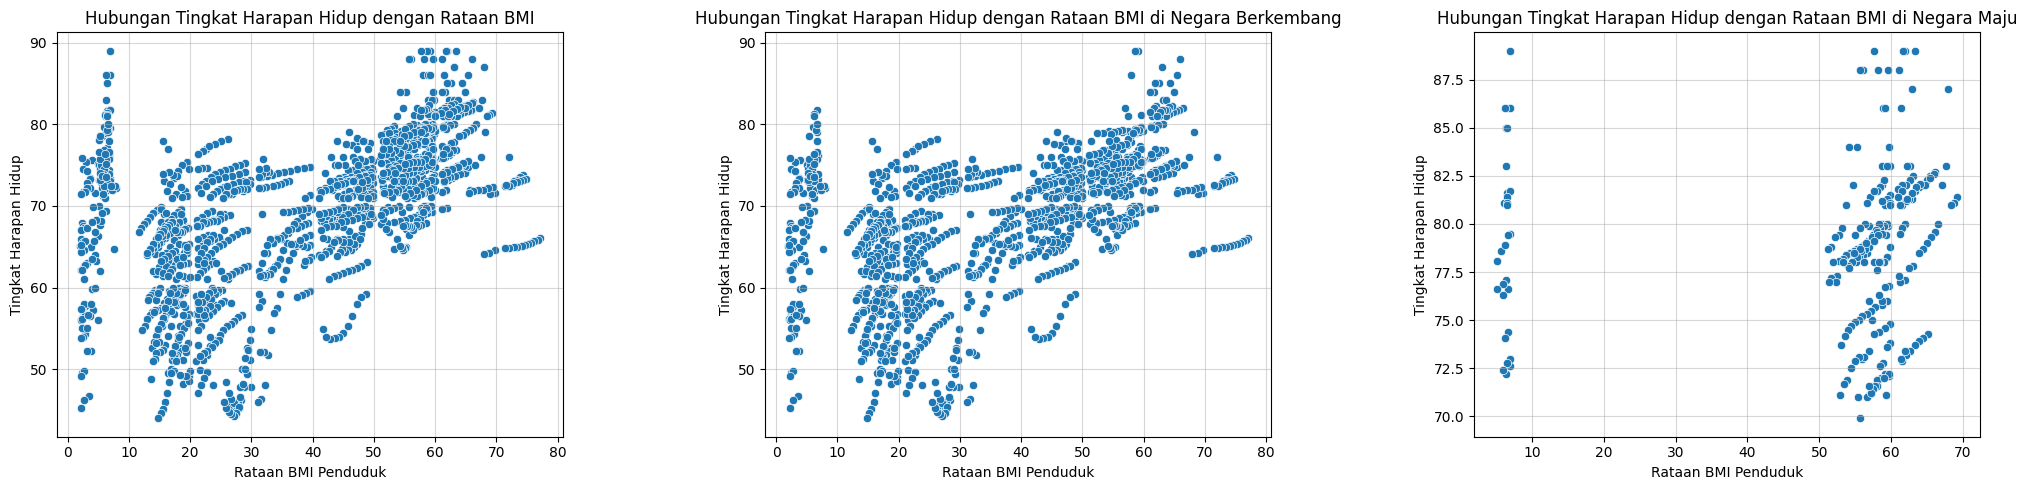

In [405]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Membandingkan data keseluruhan dengan data negara maju dan berkembang
raw_plot(axes, 0, df, ' BMI ', 'Rataan BMI Penduduk', 'Rataan BMI')
raw_plot(axes, 1, developing_df, ' BMI ', 'Rataan BMI Penduduk', 'Rataan BMI di Negara Berkembang')
raw_plot(axes, 2, developed_df, ' BMI ', 'Rataan BMI Penduduk', 'Rataan BMI di Negara Maju')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

### Hubungan antara life expectacy dengan persentase imunisasi hepatitis B

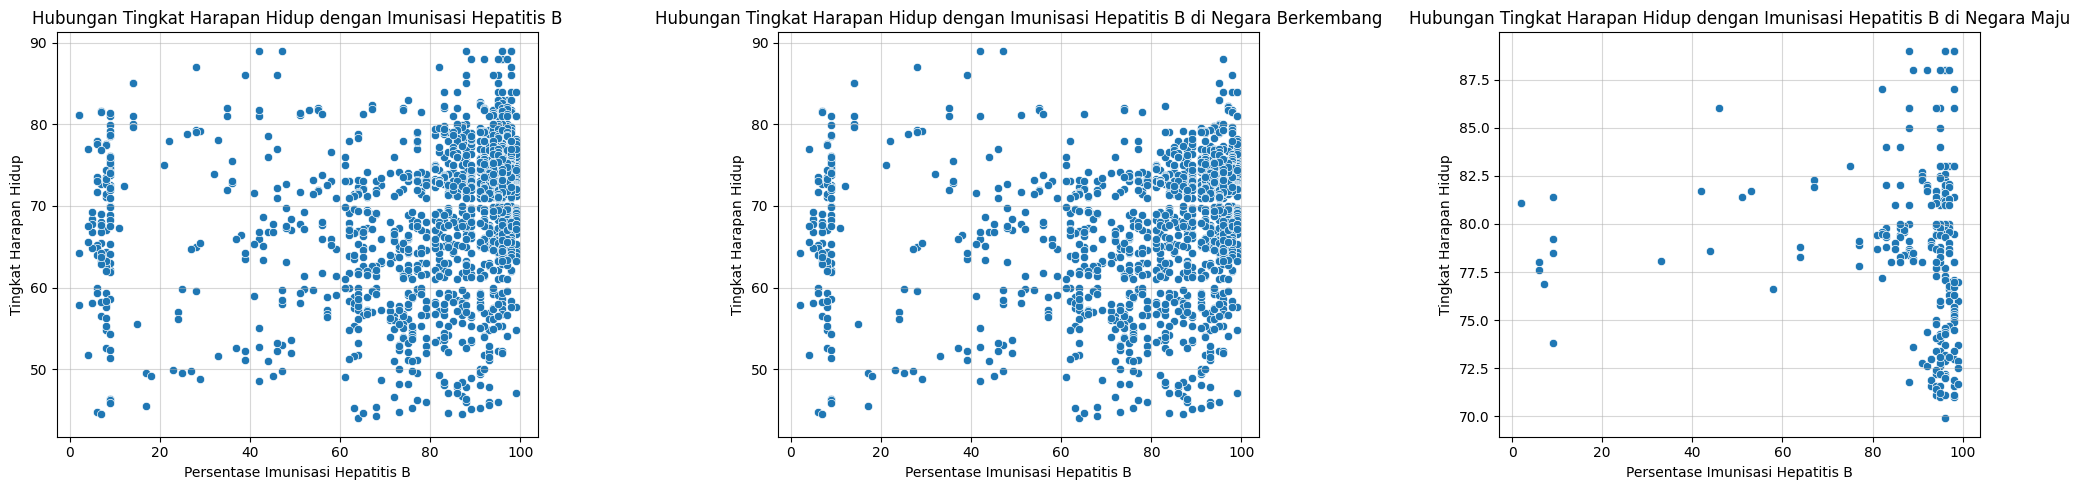

In [406]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Membandingkan data keseluruhan dengan data negara maju dan berkembang
raw_plot(axes, 0, df, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Imunisasi Hepatitis B')
raw_plot(axes, 1, developing_df, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Imunisasi Hepatitis B di Negara Berkembang')
raw_plot(axes, 2, developed_df, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Imunisasi Hepatitis B di Negara Maju')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

## Regresi Linear

## Menentukan Parameter terbaik dengan Least Square

Model Regresi Linear:
$$
\hat{y}^{(i)}= \beta_0 + \beta_1 x^{(i)}.
$$
Akan dicari nilai $\beta_0$ dan $\beta_1$ terbaik yang dapat mencocokkan model dengan data.

Ingat kembali beberapa definisi dan notasi berikut:

$$
\begin{align}
\bar{x} &= \dfrac{1}{n}\sum\limits_{i=1}^n x^{(i)}\\
\bar{y} &= \dfrac{1}{n}\sum\limits_{i=1}^n x^{(i)}\\
S_{xx} &= \sum\limits_{i=1}^n (x^{(i)}-\bar{x})^2\\
S_{xy} &= \sum\limits_{i=1}^n (x^{(i)}-\bar{x})(y^{(i)}-\bar{y})\\
S_{yy} &= \sum\limits_{i=1}^n (y^{(i)}-\bar{y})^2
\end{align}
$$

Maka, berdasarkan persamaan normal, nilai estimator $b_0$ dan $b_1$ terbaik untuk mengestimasi parameter $\beta_0$ dan $\beta_1$ dapat diperoleh melalui formula berikut.

$$
\begin{align}
b_1 &= \dfrac{S_{xy}}{S_{xx}}\\
b_0 &= \bar{y}-b_1\bar{x}\\
\end{align}
$$

## Membuat evaluasi data

Untuk membuat evaluasi data, diperlukan untuk menghitung beberapa besaran berikut.

$$
\begin{align}
SSE=RSS &= \sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2\\
SSR=ESS &= \sum\limits_{i=1}^n (\hat{y}^{(i)}-\bar{y})^2\\
SST=TSS &= \sum\limits_{i=1}^n (y^{(i)}-\bar{y})^2\\
\end{align}
$$

Ukuran evaluasi kesuksesan suatu model regresi linear dapat ditinjau melalui beberapa ukuran berikut:

$$
\begin{align}
\rho &= \dfrac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}\\
R^2 &= 1-\dfrac{SSE}{SST}= 1-\dfrac{RSS}{TSS}\\
MSE &= \dfrac{1}{n-2}SSE = \dfrac{1}{n-2}\sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2\\
RMSE &= \sqrt{\dfrac{1}{n-2}SSE} = \sqrt{\dfrac{1}{n-2}\sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2}\\
\end{align}
$$



### Pembuatan Berbagai Fungsi

#### Mencari parameter terbaik

In [407]:
def best_param(x, y, x_column_name, x_label, x_title, param_list, method):
    # Rataan
    x_bar = np.mean(x[x_column_name])
    y_bar = np.mean(y['Life expectancy '])

    # Menghitung Sx dan Sy sebagai bantuan
    Sx = x[x_column_name] - x_bar   #x_i - xbar
    Sy = y['Life expectancy '] - y_bar   #y_i - y_bar

    # hitung semua nilai rata-rata dan simpangan
    Sxx = np.sum(Sx.values * Sx.values)
    Sxy = np.sum(Sx.values * Sy.values)
    Syy = np.sum(Sy.values * Sy.values)

    # hitung nilai b0 dan b1
    b1 = Sxy / Sxx
    b0 = y_bar - (b1 * x_bar)

    ##### PLOTTING #####
    # x_line membangkitkan titik-titik diskrit di antara rentang data di list x
    x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

    # y_line menunjukkan nilai y dari persamaan linear y = b0 + b1 * x
    y_line = b0 + b1 * x_line

    fig = plt.figure(figsize =(10, 8))

    # plot garis
    plt.plot(x_line, y_line, label = "model", c = "red")

    # plot data
    plt.scatter(x[x_column_name], y['Life expectancy '], label = "data")

    plt.xlabel(x_label)
    plt.ylabel('Tingkat Harapan Hidup')
    plt.title(f'Hubungan Tingkat Harapan Hidup dengan {x_title}')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


    # Menampilkan rataan, simpangan, serta nilai b0 dan b1
    print(f"Rataan x \t: {x_bar: .3f}")
    print(f"Rataan y \t: {y_bar: .3f}")
    print(f"Simpangan xx \t: {Sxx: .3f}")
    print(f"Simpangan xy \t: {Sxy: .3f}")
    print(f"Simpangan yy \t: {Syy: .3f}")
    print()
    print(f"Nilai b0 \t: {b0: .3f}")
    print(f"Nilai b1 \t: {b1: .3f}")

    # Menghitung SSE, SSR, dan SST
    y_hat = b0 + b1 * x

    SSE = np.sum((y_hat.values - y.values) ** 2)
    SSR = np.sum((y_hat.values - y_bar) ** 2)
    SST = SSE + SSR

    print(f"SSE     \t: {SSE: .3f}")
    print(f"SSR     \t: {SSR: .3f}")
    print(f"SST     \t: {SST: .3f}")
    print()

    # Hitung metrik evaluasi model regresi linear
    rho = Sxy/(np.sqrt(Sxx * Syy))
    R_square = 1 - (SSE / SST)
    MSE = 1/(len(x)-2) * SSE
    RMSE = np.sqrt(MSE)

    print(f"rho     \t: {rho: .3f}")
    print(f"R2      \t: {R_square: .3f}")
    print(f"MSE     \t: {MSE: .3f}")
    print(f"RMSE    \t: {RMSE: .3f}")

    # Mencari transformasi yang paling berpengaruh terhadap tingkat harapan hidup
    if (len(param_list) == 0):
        param_list = [b0, b1, SSE, SSR, SST, rho, R_square, MSE, RMSE, method]
    elif np.abs(param_list[5]) < np.abs(rho):
        param_list = [b0, b1, SSE, SSR, SST, rho, R_square, MSE, RMSE, method]
    
    return param_list

#### Membuat prediksi

In [408]:
def prediction(x_predict, RMSE, b0, b1):
    alpha = 0.05

    # tentukan nilai sigma_alpha sehingga P(-sigma_alpha < epsilon < sigma_alpha) = 1 - alpha
    sigma_alpha = RMSE * norm.ppf(1-alpha/2)

    # hitung prediksi respon
    y_predict = b0 + b1 * x_predict

    # tentukan batas bawah dan atas interval hasil prediksi
    y_pred_low = y_predict - sigma_alpha
    y_pred_up = y_predict + sigma_alpha

    print(f"x_predict \t: {x_predict: .3f}")
    print(f"\nWith confidence level {1-alpha:.2%},")
    print(f"y_predict \t: {y_pred_low: .3f} - {y_pred_up: .3f}")
    return alpha, sigma_alpha

In [409]:
# Pengkategorian life_expectancy
life_expectancy_developing_df = developing_df[['Life expectancy ']]
life_expectancy_developed_df = developed_df[['Life expectancy ']]
life_expectancy_df = df[['Life expectancy ']]

### Life expectancy dengan konsumsi alkohol per kapita

#### Keseluruhan

In [410]:
x = df[['Alcohol']]
y = life_expectancy_df

# Tempat menampung best parameter
alcohol_list = []

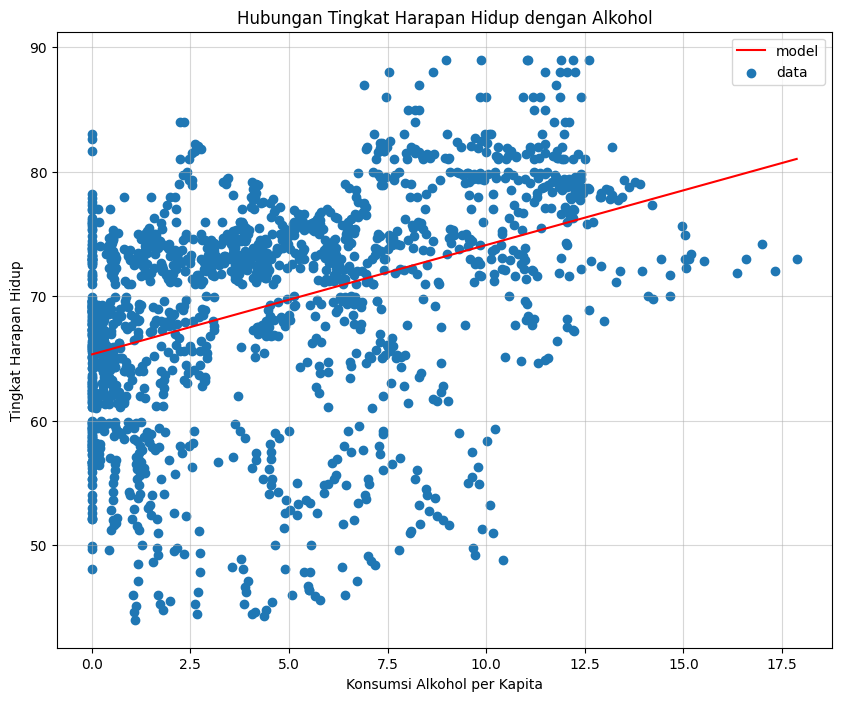

Rataan x 	:  4.533
Rataan y 	:  69.302
Simpangan xx 	:  26754.232
Simpangan xy 	:  23523.538
Simpangan yy 	:  127529.311

Nilai b0 	:  65.317
Nilai b1 	:  0.879
SSE     	:  106846.347
SSR     	:  20682.965
SST     	:  127529.311

rho     	:  0.403
R2      	:  0.162
MSE     	:  64.873
RMSE    	:  8.054


In [411]:
alcohol_list = best_param(x, y, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol', alcohol_list, "Linear")

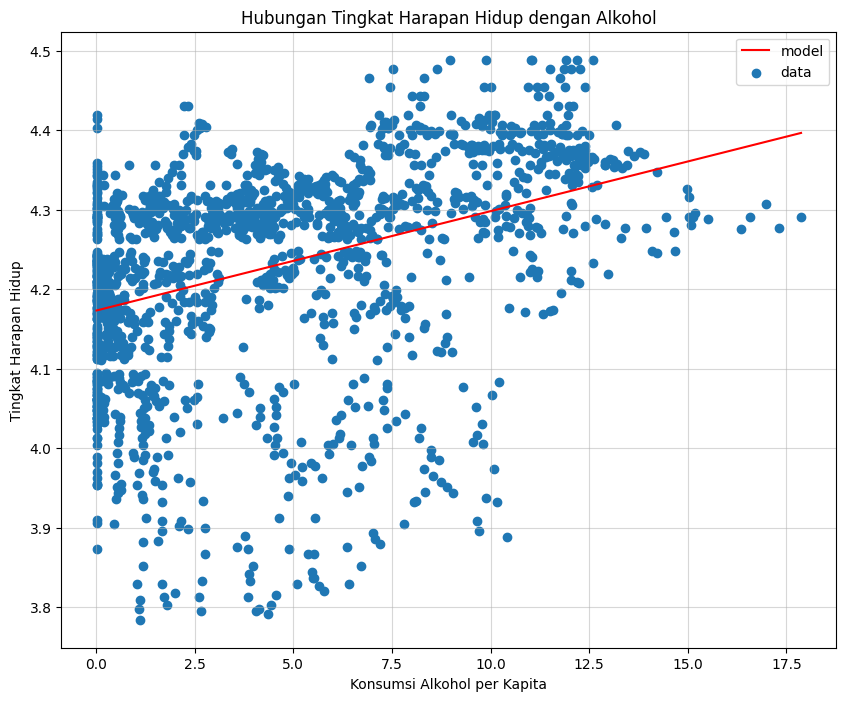

Rataan x 	:  4.533
Rataan y 	:  4.230
Simpangan xx 	:  26754.232
Simpangan xy 	:  334.582
Simpangan yy 	:  30.016

Nilai b0 	:  4.173
Nilai b1 	:  0.013
SSE     	:  25.832
SSR     	:  4.184
SST     	:  30.016

rho     	:  0.373
R2      	:  0.139
MSE     	:  0.016
RMSE    	:  0.125


In [412]:
alcohol_list = best_param(x, np.log(y), 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol', alcohol_list, "Exponential")

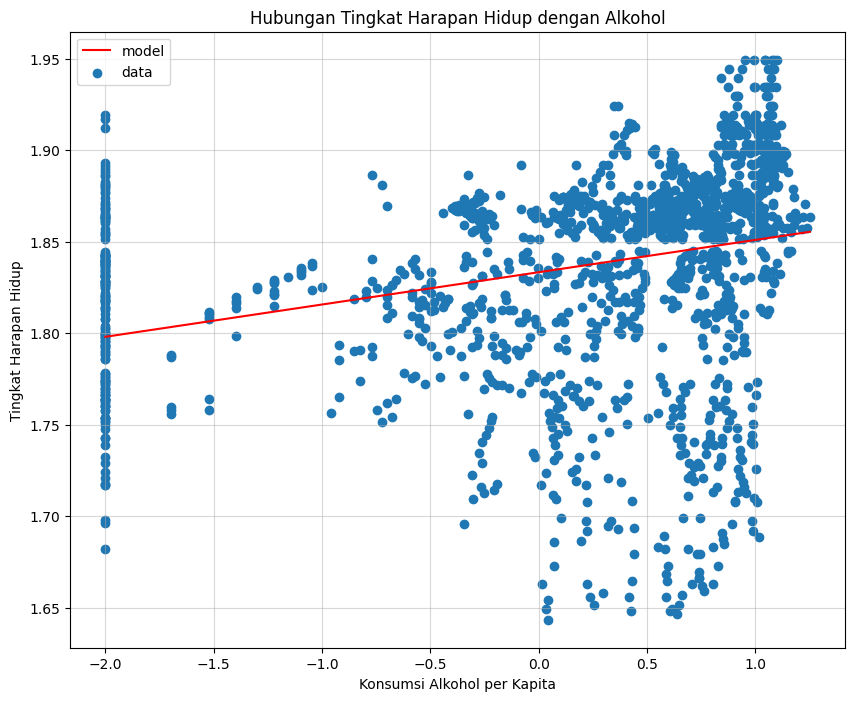

Rataan x 	:  0.208
Rataan y 	:  1.837
Simpangan xx 	:  1455.660
Simpangan xy 	:  25.675
Simpangan yy 	:  5.661

Nilai b0 	:  1.833
Nilai b1 	:  0.018
SSE     	:  5.208
SSR     	:  0.453
SST     	:  5.661

rho     	:  0.283
R2      	:  0.080
MSE     	:  0.003
RMSE    	:  0.056


In [413]:
alcohol_list = best_param(np.log10(x), np.log10(y), 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol', alcohol_list, "Power")

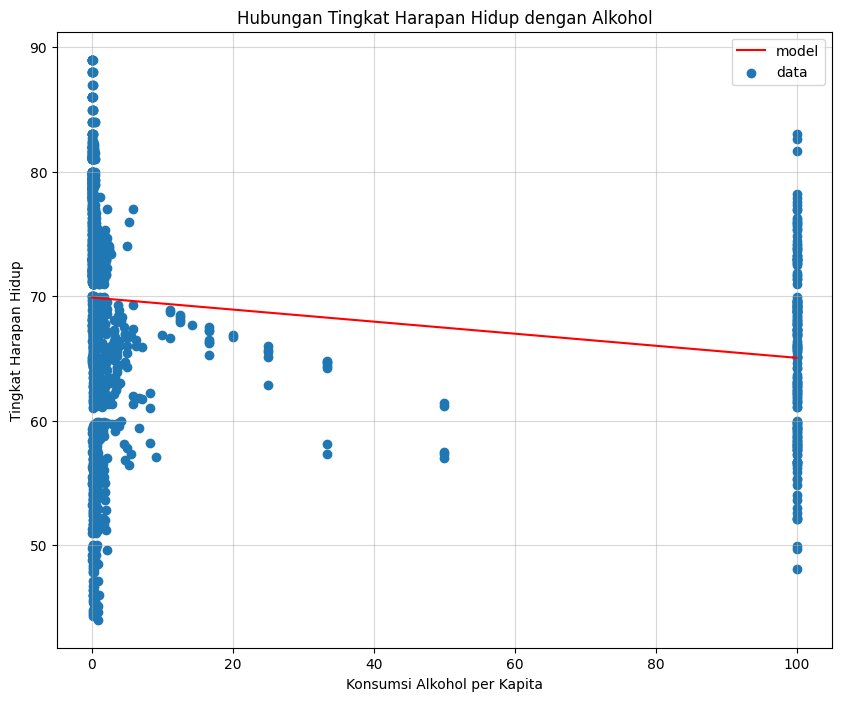

Rataan x 	:  12.176
Rataan y 	:  69.302
Simpangan xx 	:  1615215.596
Simpangan xy 	: -78272.701
Simpangan yy 	:  127529.311

Nilai b0 	:  69.892
Nilai b1 	: -0.048
SSE     	:  123736.248
SSR     	:  3793.064
SST     	:  127529.311

rho     	: -0.172
R2      	:  0.030
MSE     	:  75.128
RMSE    	:  8.668


In [414]:
alcohol_list = best_param(1/x, y, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol', alcohol_list, "Reciprocal")

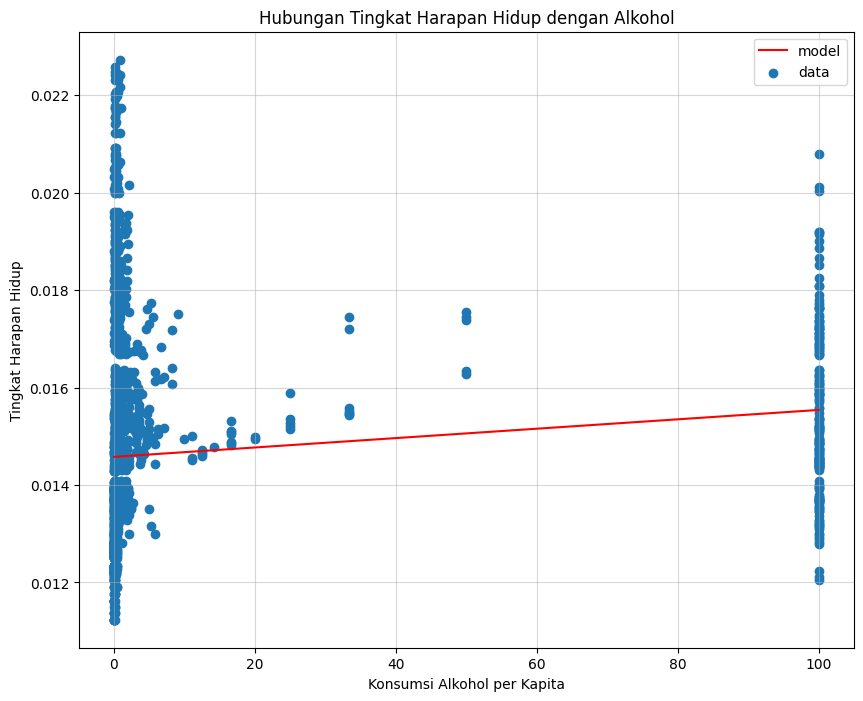

Rataan x 	:  12.176
Rataan y 	:  0.015
Simpangan xx 	:  1615215.596
Simpangan xy 	:  15.557
Simpangan yy 	:  0.007

Nilai b0 	:  0.015
Nilai b1 	:  0.000
SSE     	:  0.007
SSR     	:  0.000
SST     	:  0.007

rho     	:  0.142
R2      	:  0.020
MSE     	:  0.000
RMSE    	:  0.002


In [415]:
alcohol_list = best_param(1/x, 1/y, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol', alcohol_list, "Hyperbolic")

#### Metode Paling Berpengaruh

In [416]:
b0, b1, RMSE, method, rho = alcohol_list[0], alcohol_list[1], alcohol_list[-2], alcohol_list[-1], alcohol_list[5]
print(f"Metode regresi linear paling berpengaruh: {method}")
print(f"Nilai rho: {rho}")

Metode regresi linear paling berpengaruh: Linear
Nilai rho: 0.4027183217273534


### Estimasi Interval untuk data test

In [417]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 7.5

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  7.500

With confidence level 95.00%,
y_predict 	:  56.125 -  87.697


### Estimasi Interval untuk seluruh nilai data

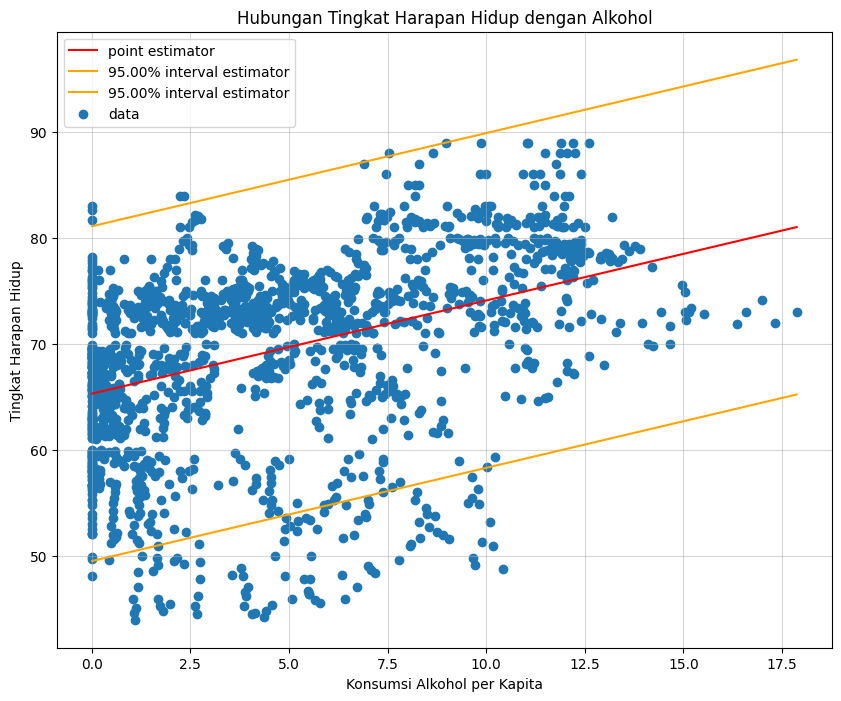

In [418]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Alcohol'], y['Life expectancy '], label = "data")

plt.xlabel('Konsumsi Alkohol per Kapita')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan Alkohol')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Menggunakan Parameter Terbaik untuk Negara Berkembang dan Negara Maju

#### Negara Berkembang

In [419]:
x = developing_df[['Alcohol']]
y = life_expectancy_developing_df

developing_alcohol_list = []

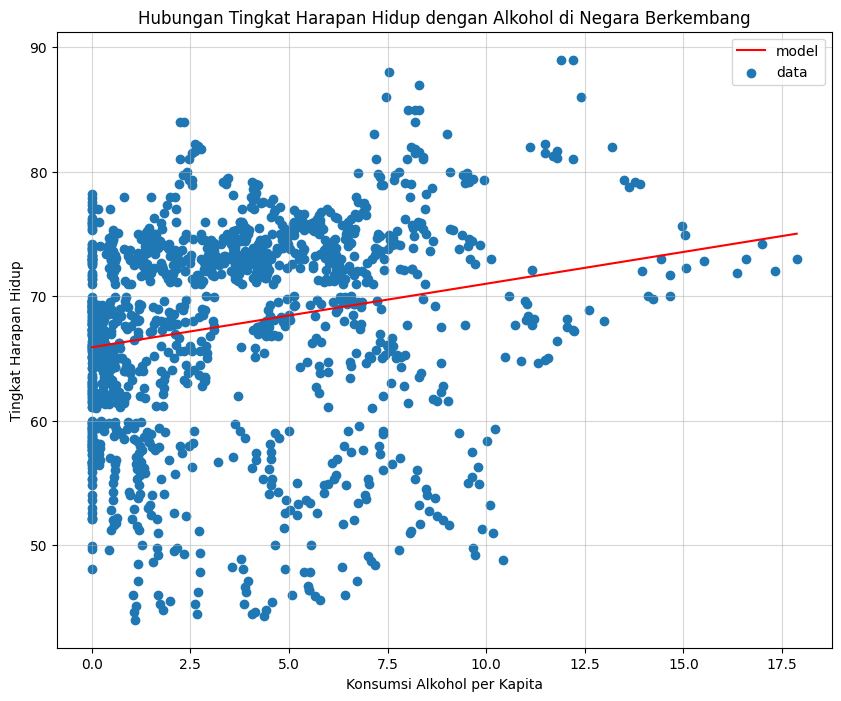

Rataan x 	:  3.518
Rataan y 	:  67.687
Simpangan xx 	:  15608.370
Simpangan xy 	:  7975.226
Simpangan yy 	:  98123.375

Nilai b0 	:  65.890
Nilai b1 	:  0.511
SSE     	:  94048.367
SSR     	:  4075.007
SST     	:  98123.375

rho     	:  0.204
R2      	:  0.042
MSE     	:  66.938
RMSE    	:  8.182


In [420]:
developing_alcohol_list = best_param(x, y, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol di Negara Berkembang', developing_alcohol_list, "Linear")

In [421]:
b0, b1, RMSE, method, rho = developing_alcohol_list[0], developing_alcohol_list[1], developing_alcohol_list[-2], developing_alcohol_list[-1], developing_alcohol_list[5]

### Estimasi Interval untuk data test

In [422]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 7.5

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  7.500

With confidence level 95.00%,
y_predict 	:  53.686 -  85.758


### Estimasi Interval untuk seluruh nilai data

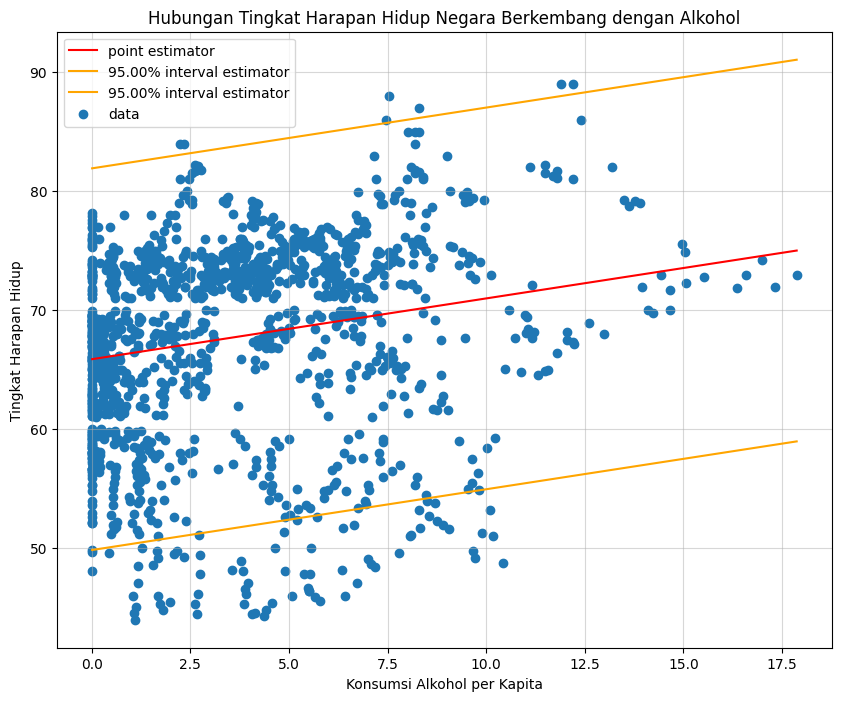

In [423]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Alcohol'], y['Life expectancy '], label = "data")

plt.xlabel('Konsumsi Alkohol per Kapita')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Berkembang dengan Alkohol')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

#### Negara Maju

In [424]:
x = developed_df[['Alcohol']]
y = life_expectancy_developed_df

developed_alcohol_list = []

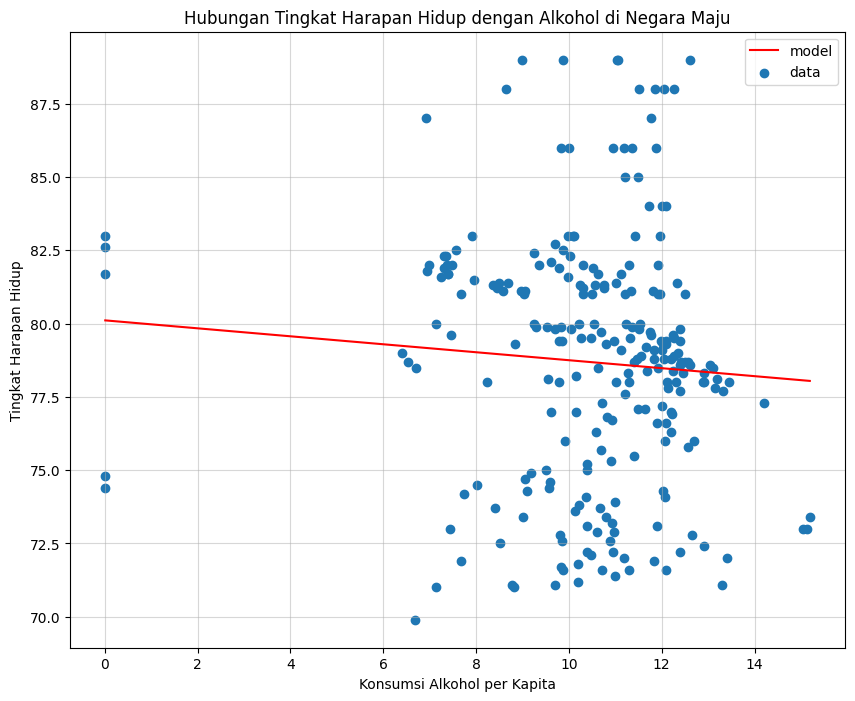

Rataan x 	:  10.436
Rataan y 	:  78.692
Simpangan xx 	:  1262.884
Simpangan xy 	: -171.747
Simpangan yy 	:  4401.303

Nilai b0 	:  80.111
Nilai b1 	: -0.136
SSE     	:  4377.947
SSR     	:  23.357
SST     	:  4401.303

rho     	: -0.073
R2      	:  0.005
MSE     	:  18.241
RMSE    	:  4.271


In [425]:
developed_alcohol_list = best_param(x, y, 'Alcohol', 'Konsumsi Alkohol per Kapita', 'Alkohol di Negara Maju', developed_alcohol_list, "Linear")

In [426]:
b0, b1, RMSE, method, rho = developed_alcohol_list[0], developed_alcohol_list[1], developed_alcohol_list[-2], developed_alcohol_list[-1], developed_alcohol_list[5]

### Estimasi Interval untuk data test

In [427]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 7.5

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  7.500

With confidence level 95.00%,
y_predict 	:  70.720 -  87.462


### Estimasi Interval untuk seluruh nilai data

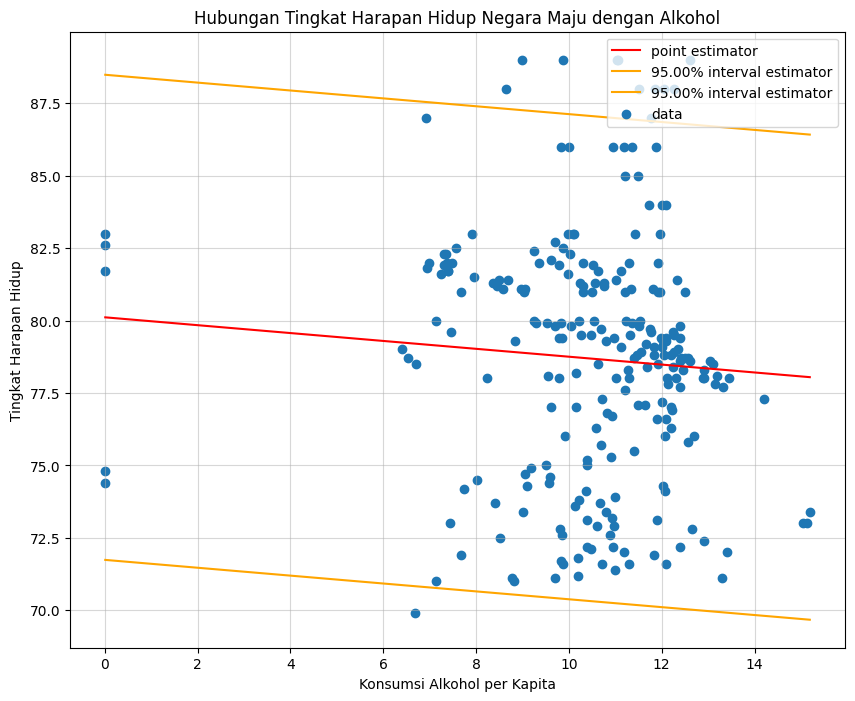

In [428]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Alcohol'], y['Life expectancy '], label = "data")

plt.xlabel('Konsumsi Alkohol per Kapita')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Maju dengan Alkohol')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Life expectacy dengan persentase belanja negara

#### Keseluruhan

In [429]:
x = df[['percentage expenditure']]
y = life_expectancy_df

expenditure_list = []

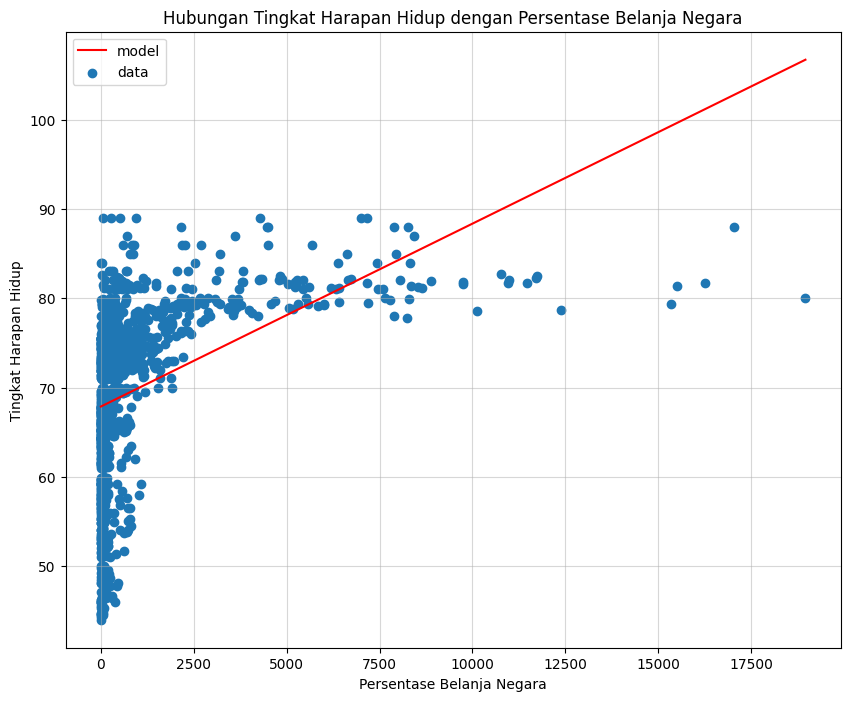

Rataan x 	:  698.974
Rataan y 	:  69.302
Simpangan xx 	:  5100375189.764
Simpangan xy 	:  10447170.885
Simpangan yy 	:  127529.311

Nilai b0 	:  67.871
Nilai b1 	:  0.002
SSE     	:  106130.223
SSR     	:  21399.088
SST     	:  127529.311

rho     	:  0.410
R2      	:  0.168
MSE     	:  64.439
RMSE    	:  8.027


In [430]:
expenditure_list = best_param(x, y, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara', expenditure_list, "Linear")

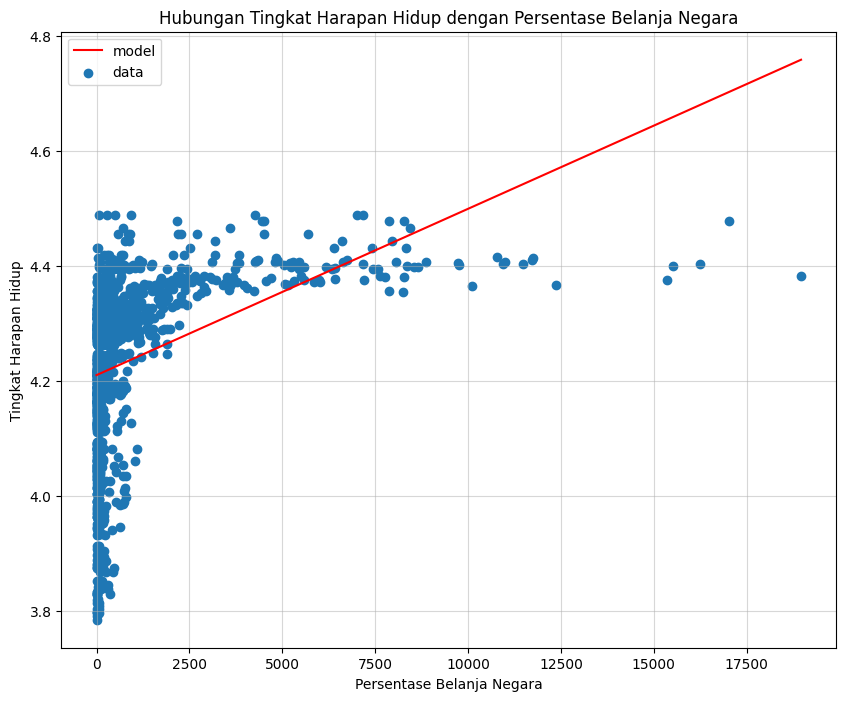

Rataan x 	:  698.974
Rataan y 	:  4.230
Simpangan xx 	:  5100375189.764
Simpangan xy 	:  147552.310
Simpangan yy 	:  30.016

Nilai b0 	:  4.210
Nilai b1 	:  0.000
SSE     	:  25.747
SSR     	:  4.269
SST     	:  30.016

rho     	:  0.377
R2      	:  0.142
MSE     	:  0.016
RMSE    	:  0.125


In [431]:
expenditure_list = best_param(x, np.log(y), 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara', expenditure_list, "Exponential")

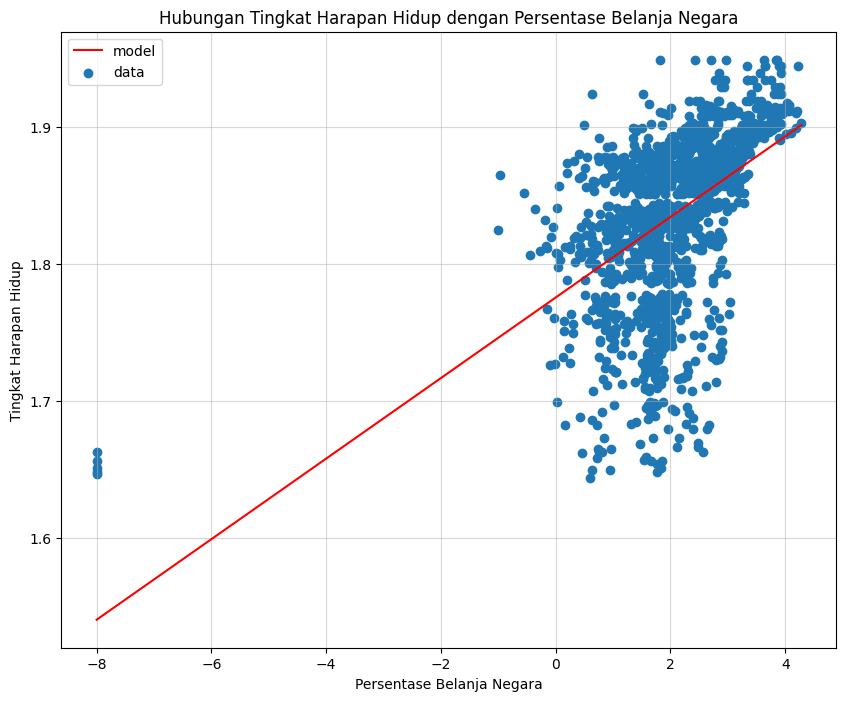

Rataan x 	:  2.085
Rataan y 	:  1.837
Simpangan xx 	:  1725.309
Simpangan xy 	:  50.797
Simpangan yy 	:  5.661

Nilai b0 	:  1.776
Nilai b1 	:  0.029
SSE     	:  4.166
SSR     	:  1.496
SST     	:  5.661

rho     	:  0.514
R2      	:  0.264
MSE     	:  0.003
RMSE    	:  0.050


In [432]:
expenditure_list = best_param(np.log10(x), np.log10(y), 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara', expenditure_list, "Power")

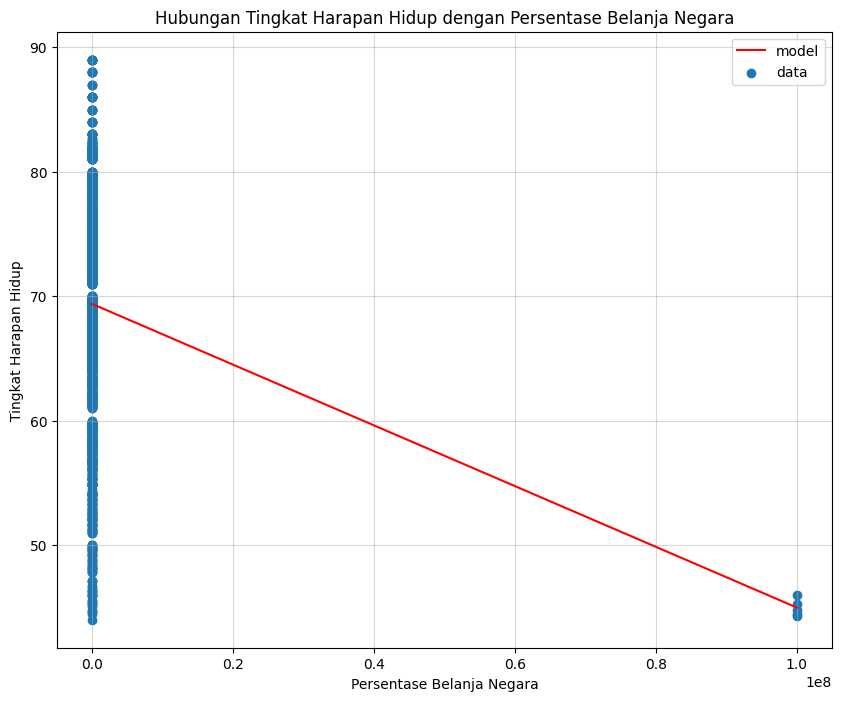

Rataan x 	:  303214.133
Rataan y 	:  69.302
Simpangan xx 	:  49848392901961392.000
Simpangan xy 	: -12161152637.833
Simpangan yy 	:  127529.311

Nilai b0 	:  69.376
Nilai b1 	: -0.000
SSE     	:  124562.443
SSR     	:  2966.869
SST     	:  127529.311

rho     	: -0.153
R2      	:  0.023
MSE     	:  75.630
RMSE    	:  8.697


In [433]:
expenditure_list = best_param(1/x, y, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara', expenditure_list, "Reciprocal")

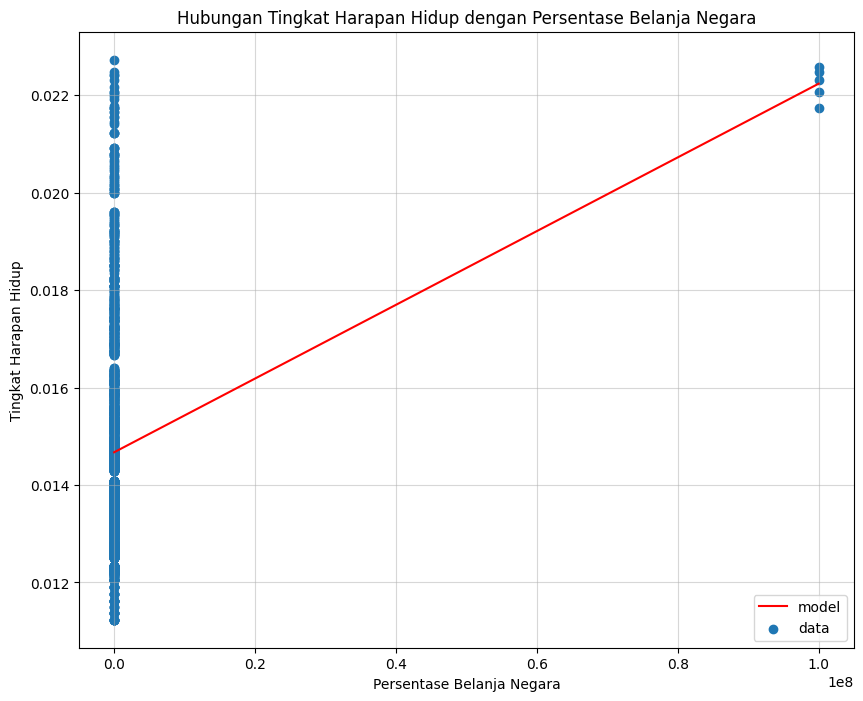

Rataan x 	:  303214.133
Rataan y 	:  0.015
Simpangan xx 	:  49848392901961392.000
Simpangan xy 	:  3770660.957
Simpangan yy 	:  0.007

Nilai b0 	:  0.015
Nilai b1 	:  0.000
SSE     	:  0.007
SSR     	:  0.000
SST     	:  0.007

rho     	:  0.196
R2      	:  0.038
MSE     	:  0.000
RMSE    	:  0.002


In [434]:
expenditure_list = best_param(1/x, 1/y, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara', expenditure_list, "Hyperbolic")

#### Metode Paling Berpengaruh

In [435]:
b0, b1, RMSE, method, rho = expenditure_list[0], expenditure_list[1], expenditure_list[-2], expenditure_list[-1], expenditure_list[5]
print(f"Metode regresi linear paling berpengaruh: {method}")
print(f"Nilai rho: {rho}")

Metode regresi linear paling berpengaruh: Power
Nilai rho: 0.5139832575614918


In [436]:
# GLM ke Power
x = np.log10(x)
y = np.log10(y)

### Estimasi Interval untuk data test

In [437]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 3

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  3.000

With confidence level 95.00%,
y_predict 	:  1.765 -  1.962


### Estimasi Interval untuk seluruh nilai data

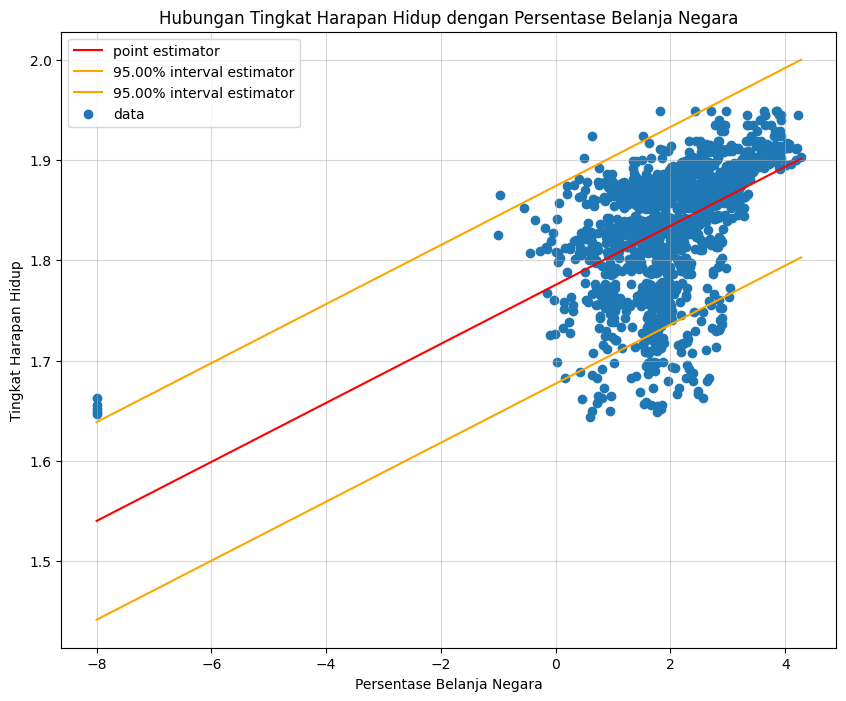

In [438]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['percentage expenditure'], y['Life expectancy '], label = "data")

plt.xlabel('Persentase Belanja Negara')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan Persentase Belanja Negara')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Menggunakan Parameter Terbaik untuk Negara Berkembang dan Negara Maju

#### Negara Berkembang

In [439]:
x = np.log10(developing_df[['percentage expenditure']])
y = np.log10(life_expectancy_developing_df)

developing_expenditure_list = []

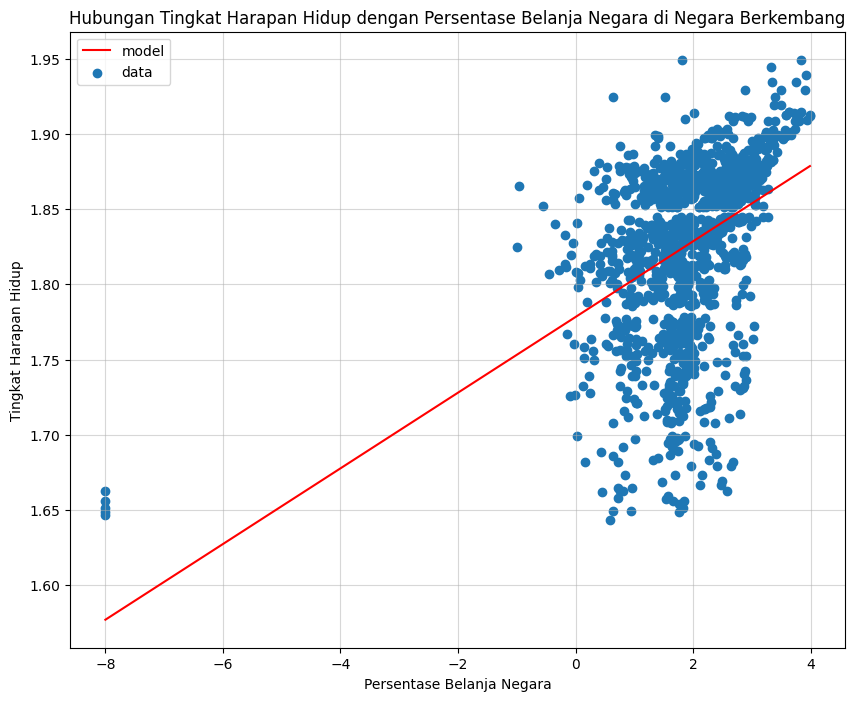

Rataan x 	:  1.933
Rataan y 	:  1.827
Simpangan xx 	:  1362.357
Simpangan xy 	:  34.280
Simpangan yy 	:  4.562

Nilai b0 	:  1.778
Nilai b1 	:  0.025
SSE     	:  3.700
SSR     	:  0.863
SST     	:  4.562

rho     	:  0.435
R2      	:  0.189
MSE     	:  0.003
RMSE    	:  0.051


In [440]:
developing_expenditure_list = best_param(x, y, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara di Negara Berkembang', developing_expenditure_list, "Power")

In [441]:
b0, b1, RMSE, method, rho = developing_expenditure_list[0], developing_expenditure_list[1], developing_expenditure_list[-2], developing_expenditure_list[-1], developing_expenditure_list[5]

### Estimasi Interval untuk data test

In [442]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 2

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  2.000

With confidence level 95.00%,
y_predict 	:  1.728 -  1.929


### Estimasi Interval untuk seluruh nilai data

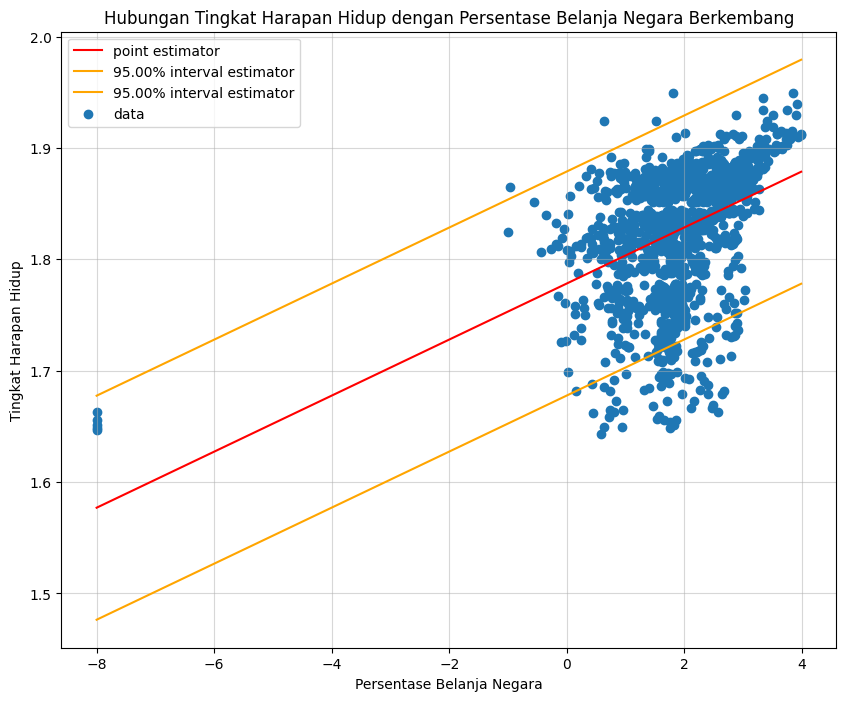

In [443]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['percentage expenditure'], y['Life expectancy '], label = "data")

plt.xlabel('Persentase Belanja Negara')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan Persentase Belanja Negara Berkembang')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

#### Negara Maju

In [444]:
x = np.log10(developed_df[['percentage expenditure']])
y = np.log10(life_expectancy_developed_df)

developed_expenditure_list = []

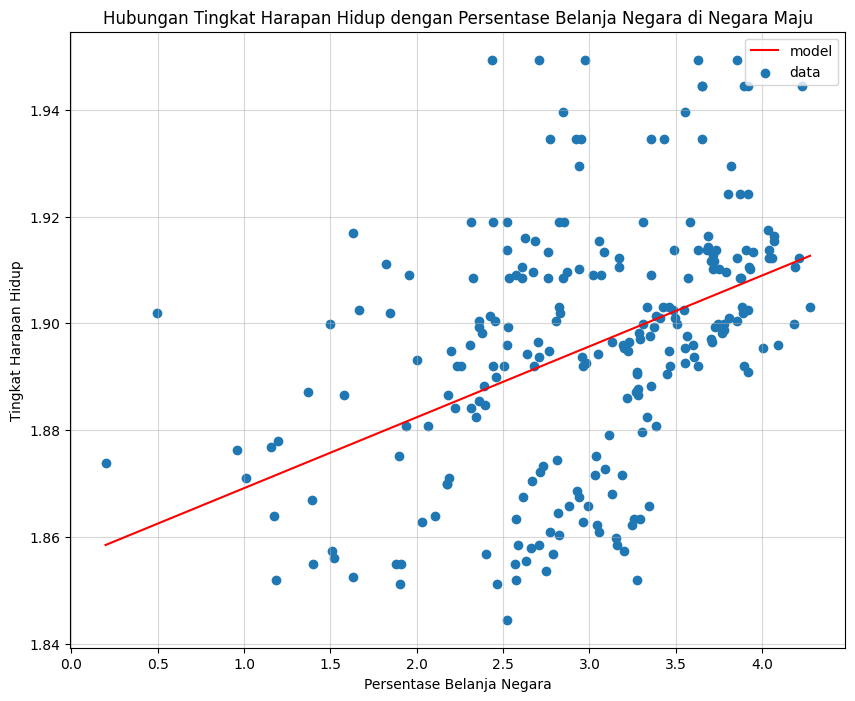

Rataan x 	:  2.970
Rataan y 	:  1.895
Simpangan xx 	:  140.500
Simpangan xy 	:  1.866
Simpangan yy 	:  0.134

Nilai b0 	:  1.856
Nilai b1 	:  0.013
SSE     	:  0.109
SSR     	:  0.025
SST     	:  0.134

rho     	:  0.430
R2      	:  0.185
MSE     	:  0.000
RMSE    	:  0.021


In [445]:
developed_expenditure_list = best_param(x, y, 'percentage expenditure', 'Persentase Belanja Negara', 'Persentase Belanja Negara di Negara Maju', developed_expenditure_list, "Power")

In [446]:
b0, b1, RMSE, method, rho = developed_expenditure_list[0], developed_expenditure_list[1], developed_expenditure_list[-2], developed_expenditure_list[-1], developed_expenditure_list[5]

### Estimasi Interval untuk data test

In [447]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 3

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  3.000

With confidence level 95.00%,
y_predict 	:  1.854 -  1.937


### Estimasi Interval untuk seluruh nilai data

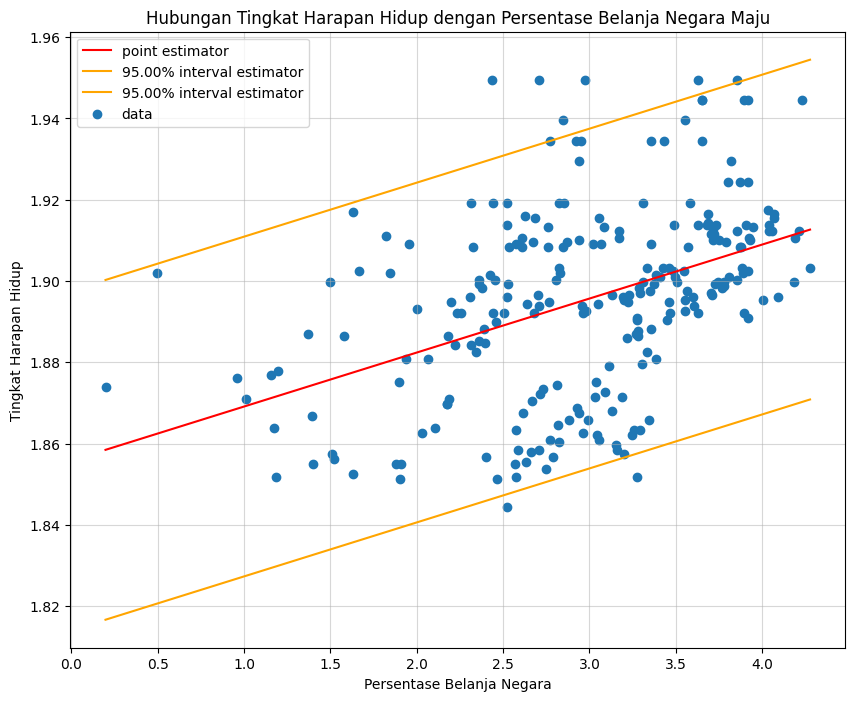

In [448]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['percentage expenditure'], y['Life expectancy '], label = "data")

plt.xlabel('Persentase Belanja Negara')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan Persentase Belanja Negara Maju')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Life expectacy dengan BMI

#### Keseluruhan

In [449]:
x = df[[' BMI ']]
y = life_expectancy_df

bmi_list = []

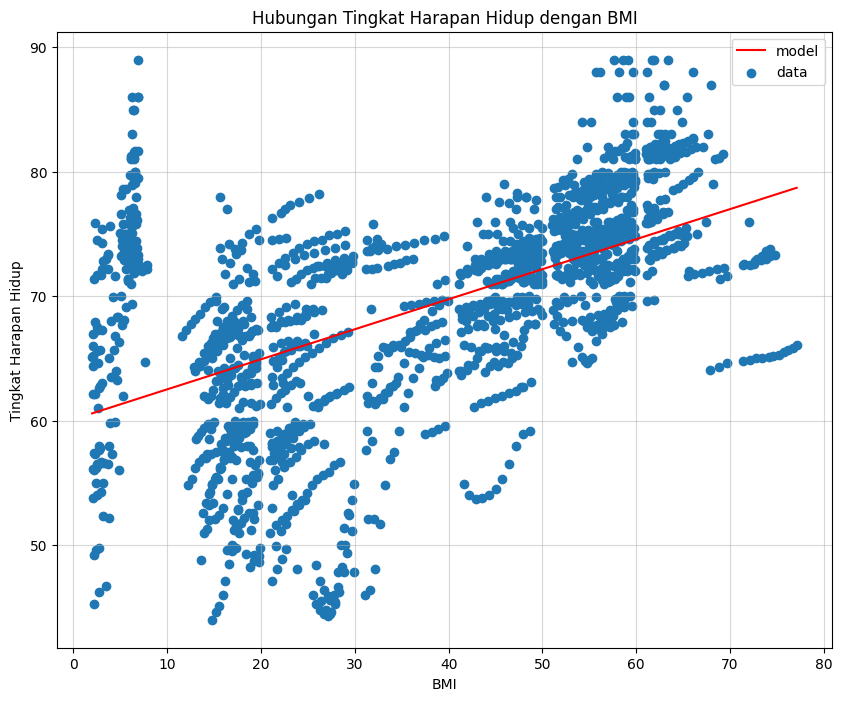

Rataan x 	:  38.129
Rataan y 	:  69.302
Simpangan xx 	:  643099.649
Simpangan xy 	:  155230.391
Simpangan yy 	:  127529.311

Nilai b0 	:  60.099
Nilai b1 	:  0.241
SSE     	:  90060.041
SSR     	:  37469.270
SST     	:  127529.311

rho     	:  0.542
R2      	:  0.294
MSE     	:  54.681
RMSE    	:  7.395


In [450]:
bmi_list = best_param(x, y, ' BMI ', 'BMI', 'BMI', bmi_list, "Linear")

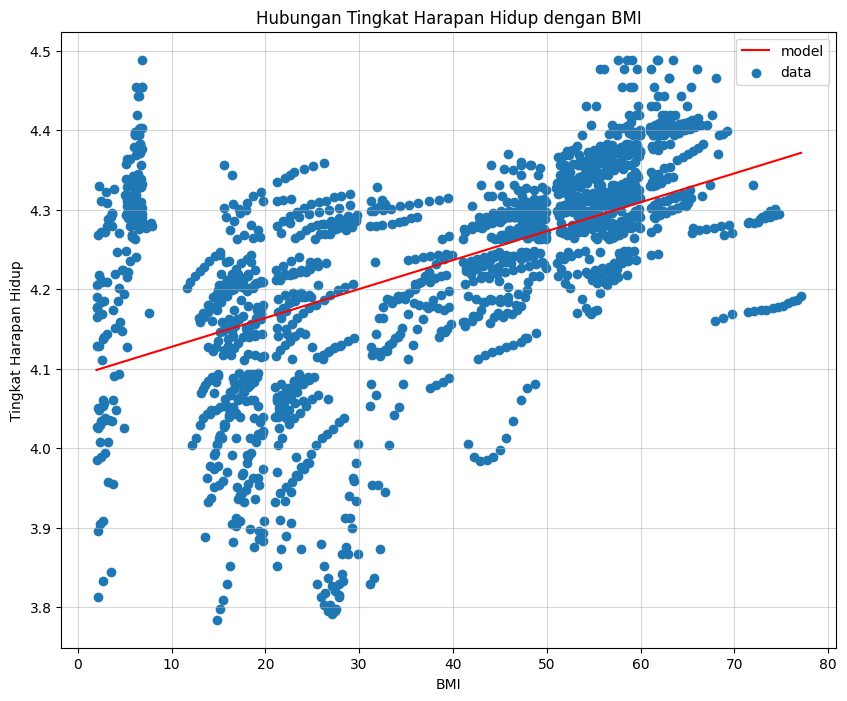

Rataan x 	:  38.129
Rataan y 	:  4.230
Simpangan xx 	:  643099.649
Simpangan xy 	:  2338.908
Simpangan yy 	:  30.016

Nilai b0 	:  4.091
Nilai b1 	:  0.004
SSE     	:  21.509
SSR     	:  8.506
SST     	:  30.016

rho     	:  0.532
R2      	:  0.283
MSE     	:  0.013
RMSE    	:  0.114


In [451]:
bmi_list = best_param(x, np.log(y), ' BMI ', 'BMI', 'BMI', bmi_list, "Exponential")

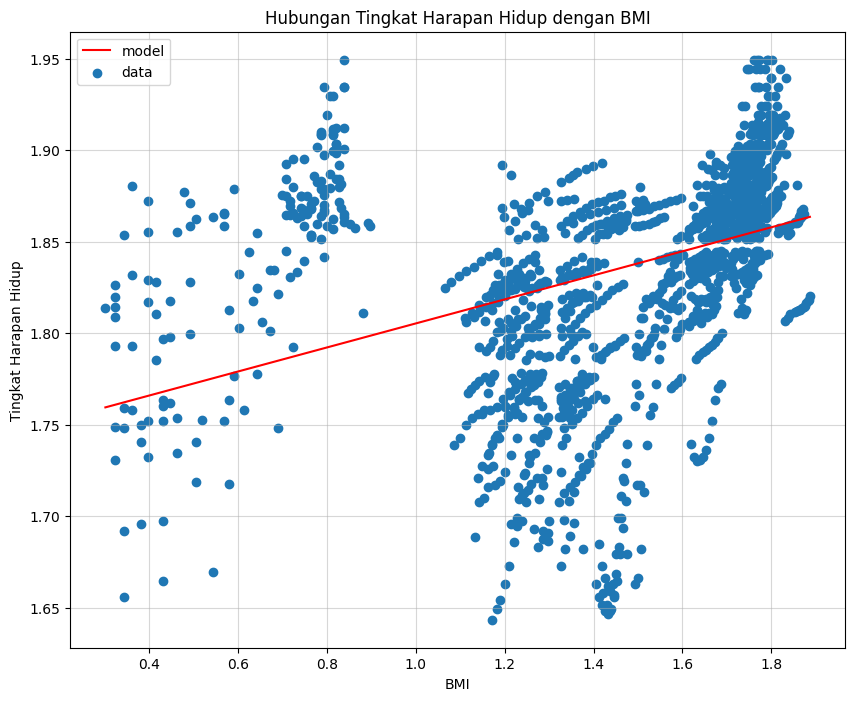

Rataan x 	:  1.482
Rataan y 	:  1.837
Simpangan xx 	:  201.636
Simpangan xy 	:  13.233
Simpangan yy 	:  5.661

Nilai b0 	:  1.740
Nilai b1 	:  0.066
SSE     	:  4.793
SSR     	:  0.868
SST     	:  5.661

rho     	:  0.392
R2      	:  0.153
MSE     	:  0.003
RMSE    	:  0.054


In [452]:
bmi_list = best_param(np.log10(x), np.log10(y), ' BMI ', 'BMI', 'BMI', bmi_list, "Power")

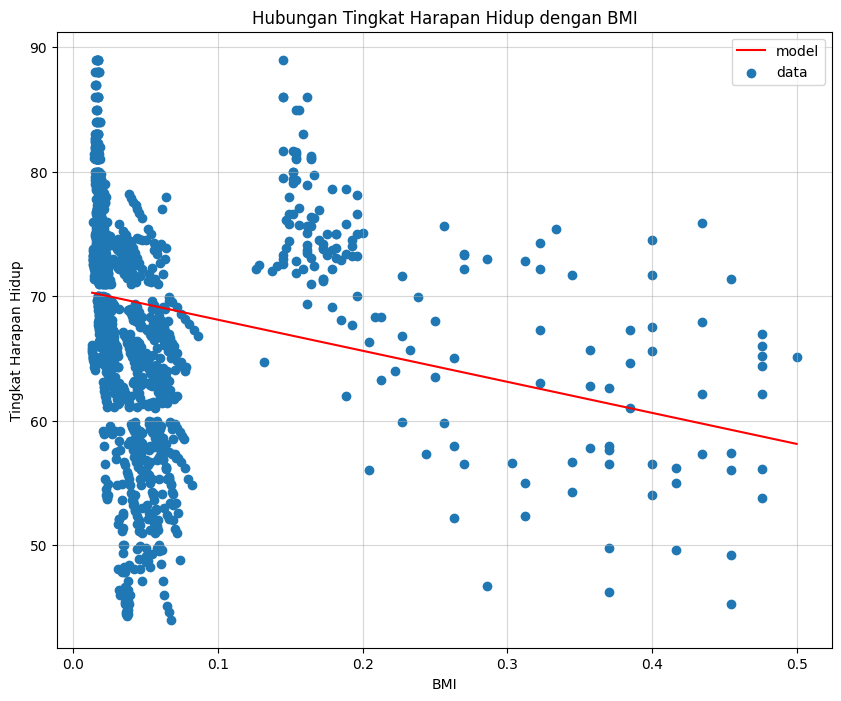

Rataan x 	:  0.052
Rataan y 	:  69.302
Simpangan xx 	:  9.321
Simpangan xy 	: -232.504
Simpangan yy 	:  127529.311

Nilai b0 	:  70.600
Nilai b1 	: -24.943
SSE     	:  121729.884
SSR     	:  5799.427
SST     	:  127529.311

rho     	: -0.213
R2      	:  0.045
MSE     	:  73.910
RMSE    	:  8.597


In [453]:
bmi_list = best_param(1/x, y, ' BMI ', 'BMI', 'BMI', bmi_list, "Reciprocal")

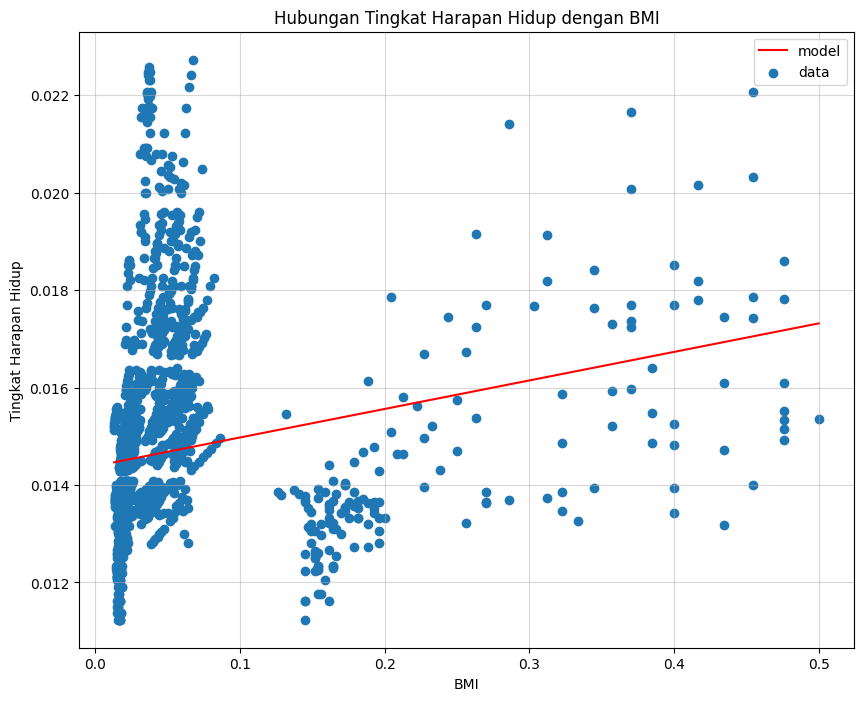

Rataan x 	:  0.052
Rataan y 	:  0.015
Simpangan xx 	:  9.321
Simpangan xy 	:  0.055
Simpangan yy 	:  0.007

Nilai b0 	:  0.014
Nilai b1 	:  0.006
SSE     	:  0.007
SSR     	:  0.000
SST     	:  0.007

rho     	:  0.207
R2      	:  0.043
MSE     	:  0.000
RMSE    	:  0.002


In [454]:
bmi_list = best_param(1/x, 1/y, ' BMI ', 'BMI', 'BMI', bmi_list, "Hyperbolic")

#### Metode Paling Berpengaruh

In [455]:
b0, b1, RMSE, method, rho = bmi_list[0], bmi_list[1], bmi_list[-2], bmi_list[-1], bmi_list[5]
print(f"Metode regresi linear paling berpengaruh: {method}")
print(f"Nilai rho: {rho}")

Metode regresi linear paling berpengaruh: Linear
Nilai rho: 0.5420415876915771


### Estimasi Interval untuk data test

In [456]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 55

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  55.000

With confidence level 95.00%,
y_predict 	:  58.881 -  87.868


### Estimasi Interval untuk seluruh nilai data

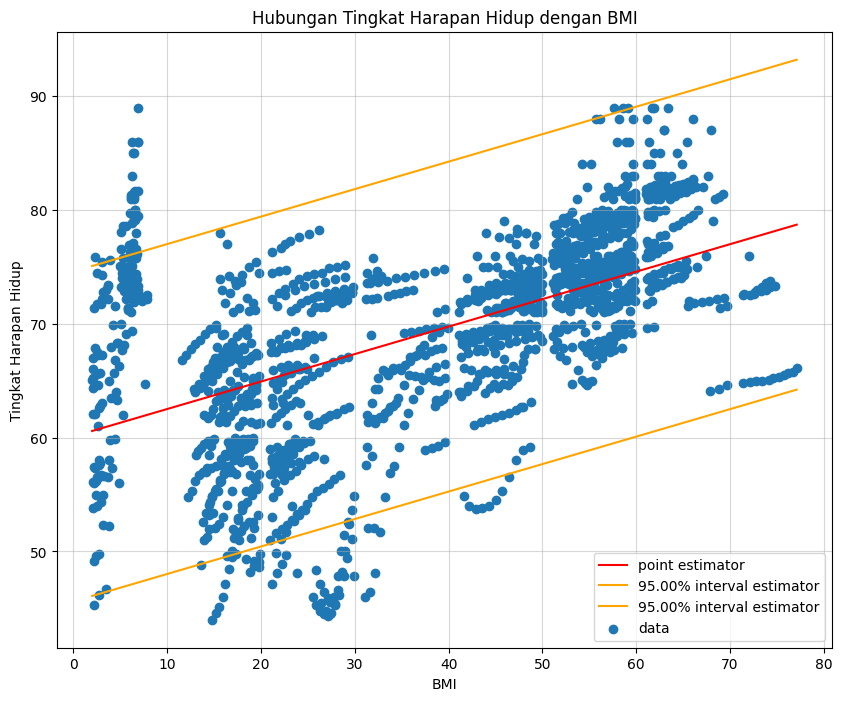

In [457]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x[' BMI '], y['Life expectancy '], label = "data")

plt.xlabel('BMI')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan BMI')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Menggunakan Parameter Terbaik untuk Negara Berkembang dan Negara Maju

#### Negara Berkembang

In [458]:
x = developing_df[[' BMI ']]
y = life_expectancy_developing_df

developing_bmi_list = []

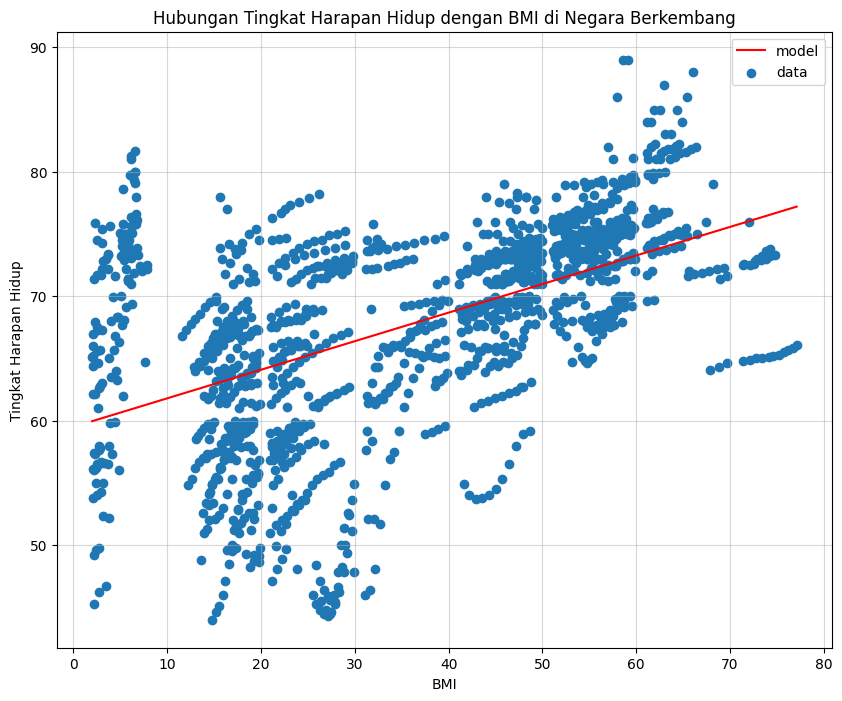

Rataan x 	:  35.685
Rataan y 	:  67.687
Simpangan xx 	:  510456.968
Simpangan xy 	:  117196.581
Simpangan yy 	:  98123.375

Nilai b0 	:  59.494
Nilai b1 	:  0.230
SSE     	:  71216.036
SSR     	:  26907.339
SST     	:  98123.375

rho     	:  0.524
R2      	:  0.274
MSE     	:  50.688
RMSE    	:  7.120


In [459]:
developing_bmi_list = best_param(x, y, ' BMI ', 'BMI', 'BMI di Negara Berkembang', developing_bmi_list, "Linear")

In [460]:
b0, b1, RMSE, method, rho = developing_bmi_list[0], developing_bmi_list[1], developing_bmi_list[-2], developing_bmi_list[-1], developing_bmi_list[5]

### Estimasi Interval untuk data test

In [461]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 55

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  55.000

With confidence level 95.00%,
y_predict 	:  58.168 -  86.076


### Estimasi Interval untuk seluruh nilai data

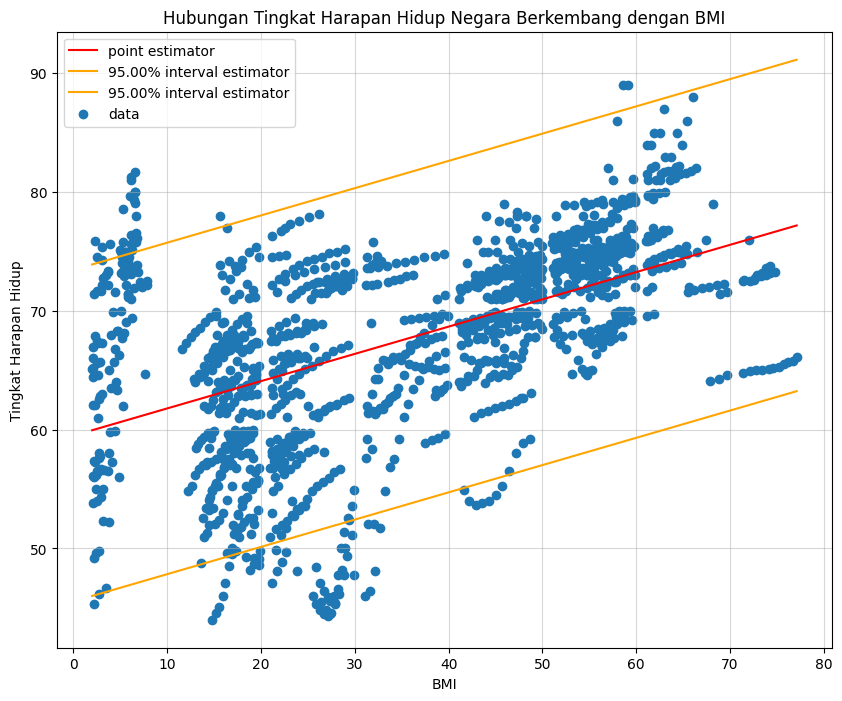

In [462]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x[' BMI '], y['Life expectancy '], label = "data")

plt.xlabel('BMI')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Berkembang dengan BMI')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

#### Negara Maju

In [463]:
x = developed_df[[' BMI ']]
y = life_expectancy_developed_df

### MENGHAPUS OUTLIER
# calculate IQR for column Height
Q1 = x[' BMI '].quantile(0.25)
Q3 = x[' BMI '].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = x[(x[' BMI '] < Q1 - threshold * IQR) | (x[' BMI '] > Q3 + threshold * IQR)]

# drop rows containing outliers
x = x[[' BMI ']].drop(outliers.index)
y = y.drop(outliers.index)

developed_bmi_list = []

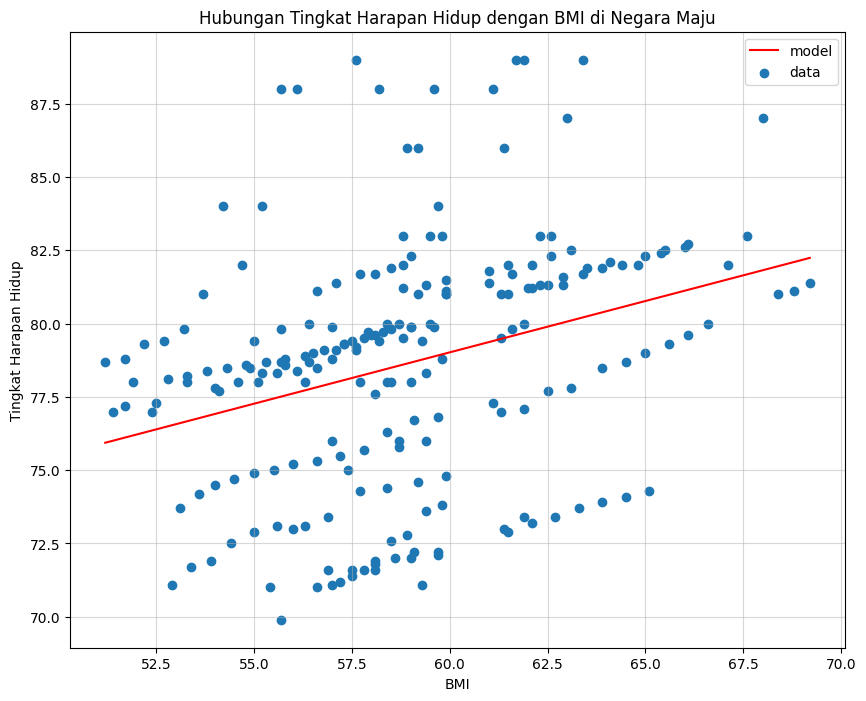

Rataan x 	:  58.842
Rataan y 	:  78.613
Simpangan xx 	:  3011.536
Simpangan xy 	:  1054.842
Simpangan yy 	:  3746.363

Nilai b0 	:  58.003
Nilai b1 	:  0.350
SSE     	:  3376.886
SSR     	:  369.477
SST     	:  3746.363

rho     	:  0.314
R2      	:  0.099
MSE     	:  16.080
RMSE    	:  4.010


In [464]:
developed_bmi_list = best_param(x, y, ' BMI ', 'BMI', 'BMI di Negara Maju', developed_bmi_list, "Linear")

In [465]:
b0, b1, RMSE, method, rho = developed_bmi_list[0], developed_bmi_list[1], developed_bmi_list[-2], developed_bmi_list[-1], developed_bmi_list[5]

### Estimasi Interval untuk data test

In [466]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 55

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  55.000

With confidence level 95.00%,
y_predict 	:  69.408 -  85.127


### Estimasi Interval untuk seluruh nilai data

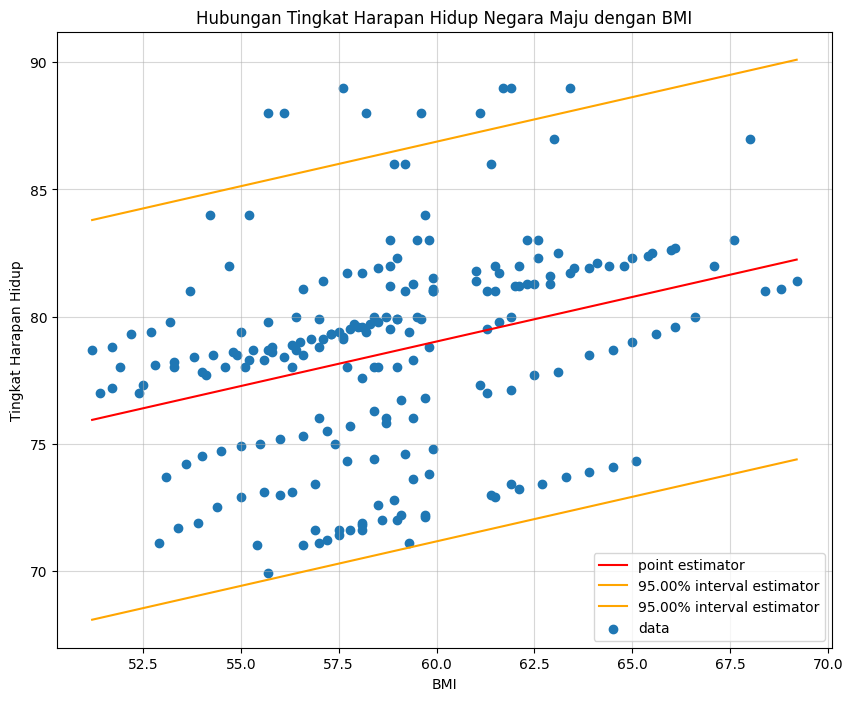

In [467]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x[' BMI '], y['Life expectancy '], label = "data")

plt.xlabel('BMI')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Maju dengan BMI')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Life expectacy dengan persentase imunisasi hepatitis B

#### Keseluruhan

In [468]:
x = df[['Hepatitis B']]
y = life_expectancy_df

hepatitis_list = []

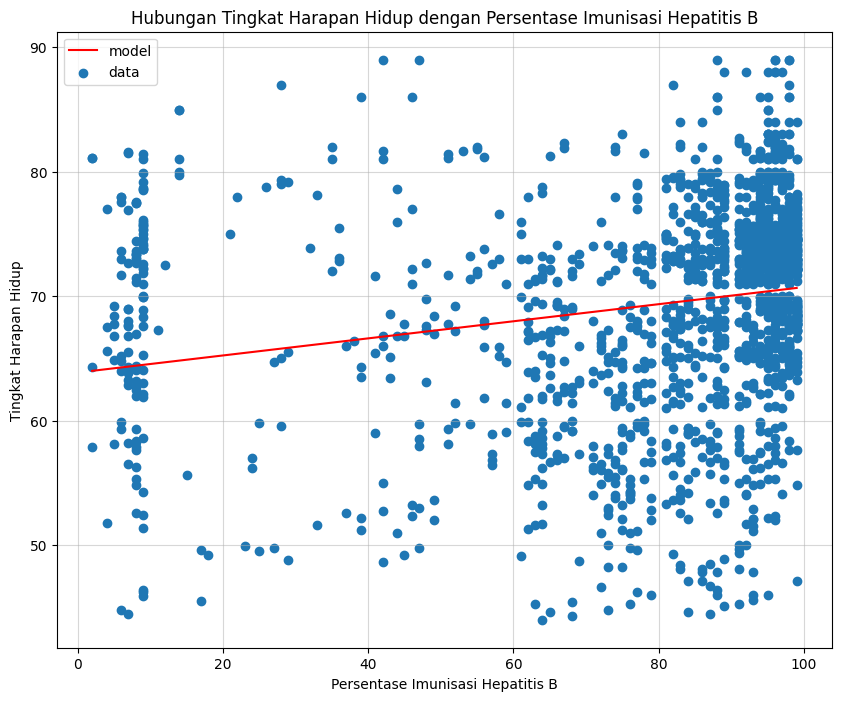

Rataan x 	:  79.218
Rataan y 	:  69.302
Simpangan xx 	:  1080426.843
Simpangan xy 	:  74215.073
Simpangan yy 	:  127529.311

Nilai b0 	:  63.861
Nilai b1 	:  0.069
SSE     	:  122431.440
SSR     	:  5097.871
SST     	:  127529.311

rho     	:  0.200
R2      	:  0.040
MSE     	:  74.336
RMSE    	:  8.622


In [469]:
hepatitis_list = best_param(x, y, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B', hepatitis_list, "Linear")

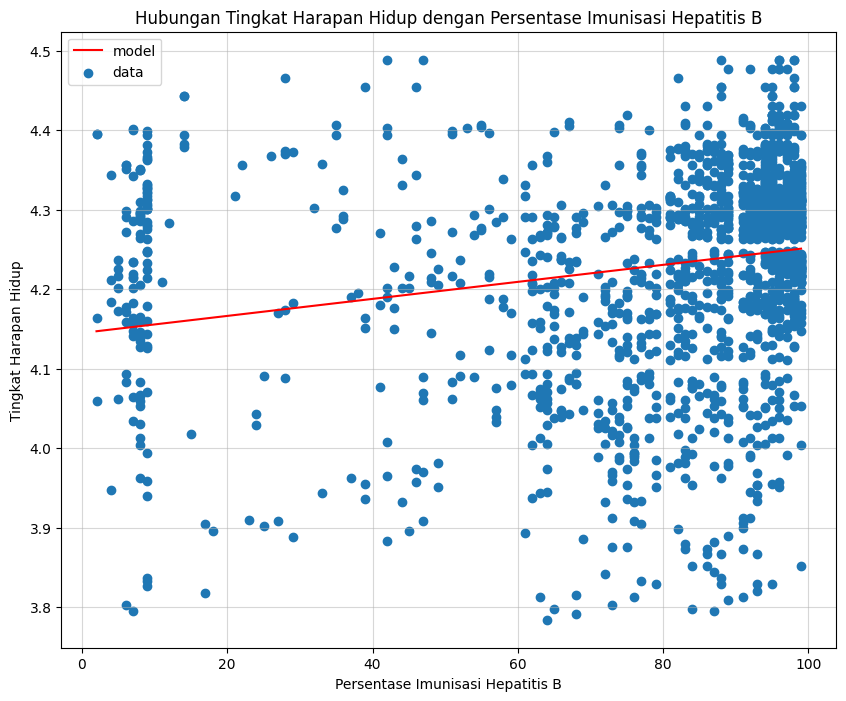

Rataan x 	:  79.218
Rataan y 	:  4.230
Simpangan xx 	:  1080426.843
Simpangan xy 	:  1156.876
Simpangan yy 	:  30.016

Nilai b0 	:  4.145
Nilai b1 	:  0.001
SSE     	:  28.777
SSR     	:  1.239
SST     	:  30.016

rho     	:  0.203
R2      	:  0.041
MSE     	:  0.017
RMSE    	:  0.132


In [470]:
hepatitis_list = best_param(x, np.log(y), 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B', hepatitis_list, "Exponential")

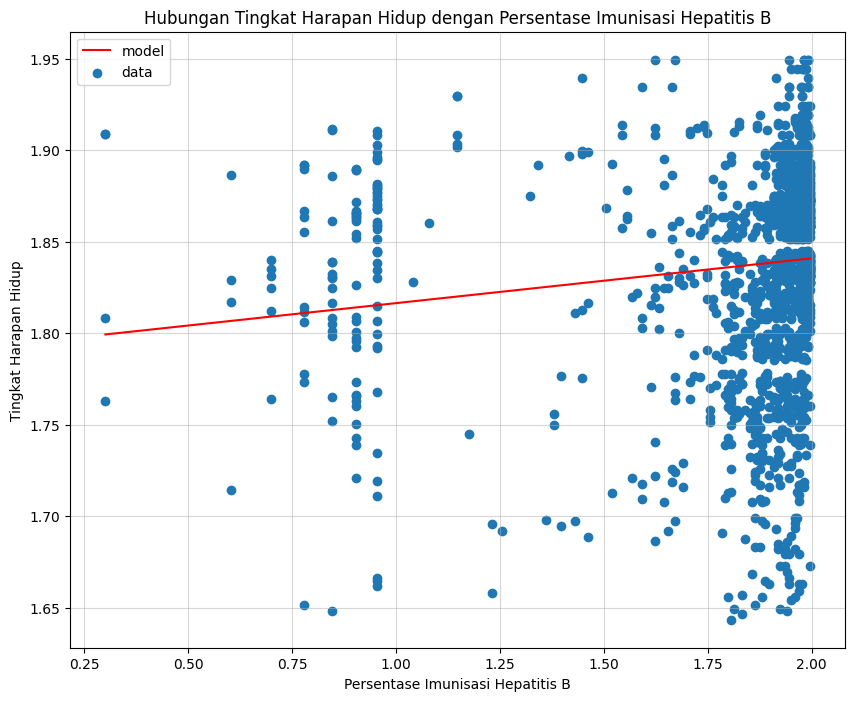

Rataan x 	:  1.839
Rataan y 	:  1.837
Simpangan xx 	:  147.464
Simpangan xy 	:  3.611
Simpangan yy 	:  5.661

Nilai b0 	:  1.792
Nilai b1 	:  0.024
SSE     	:  5.573
SSR     	:  0.088
SST     	:  5.661

rho     	:  0.125
R2      	:  0.016
MSE     	:  0.003
RMSE    	:  0.058


In [471]:
hepatitis_list = best_param(np.log10(x), np.log10(y), 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B', hepatitis_list, "Power")

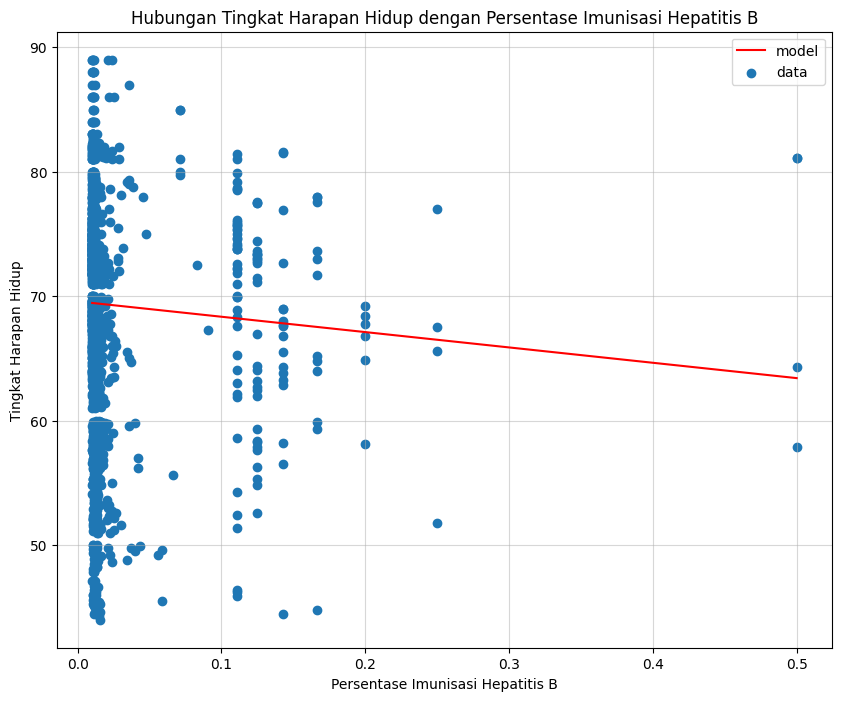

Rataan x 	:  0.023
Rataan y 	:  69.302
Simpangan xx 	:  2.694
Simpangan xy 	: -33.218
Simpangan yy 	:  127529.311

Nilai b0 	:  69.580
Nilai b1 	: -12.331
SSE     	:  127119.689
SSR     	:  409.623
SST     	:  127529.311

rho     	: -0.057
R2      	:  0.003
MSE     	:  77.183
RMSE    	:  8.785


In [472]:
hepatitis_list = best_param(1/x, y, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B', hepatitis_list, "Reciprocal")

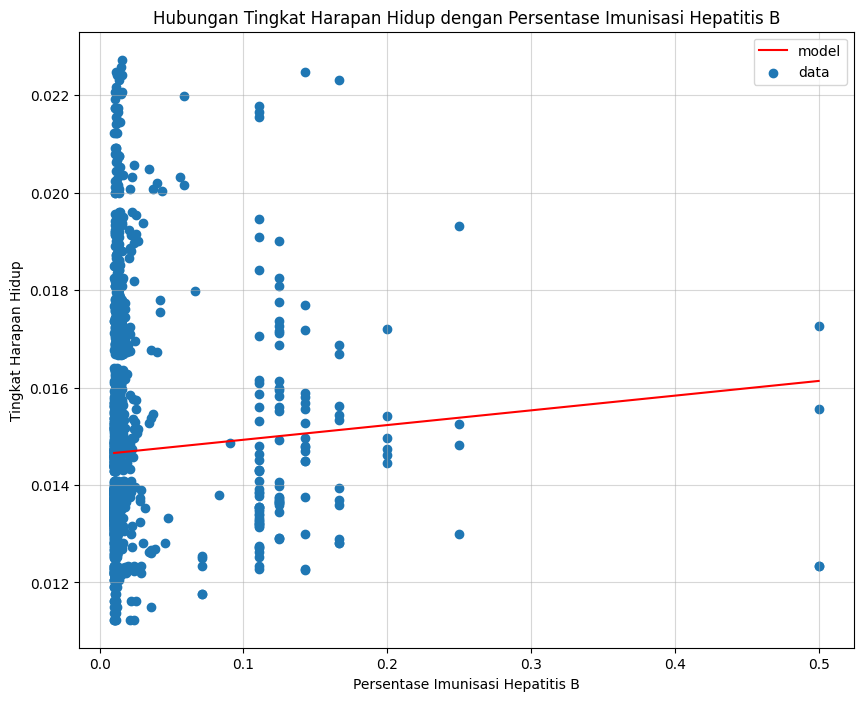

Rataan x 	:  0.023
Rataan y 	:  0.015
Simpangan xx 	:  2.694
Simpangan xy 	:  0.008
Simpangan yy 	:  0.007

Nilai b0 	:  0.015
Nilai b1 	:  0.003
SSE     	:  0.007
SSR     	:  0.000
SST     	:  0.007

rho     	:  0.057
R2      	:  0.003
MSE     	:  0.000
RMSE    	:  0.002


In [473]:
hepatitis_list = best_param(1/x, 1/y, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B', hepatitis_list, "Hyperbolic")

#### Metode Paling Berpengaruh

In [474]:
b0, b1, RMSE, method, rho = hepatitis_list[0], hepatitis_list[1], hepatitis_list[-2], hepatitis_list[-1], hepatitis_list[5]
print(f"Metode regresi linear paling berpengaruh: {method}")
print(f"Nilai rho: {rho}")

Metode regresi linear paling berpengaruh: Exponential
Nilai rho: 0.20314852332023206


In [475]:
# GLM ke Exponential
y = np.log(y)

### Estimasi Interval untuk data test

In [476]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 55

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  55.000

With confidence level 95.00%,
y_predict 	:  3.945 -  4.463


### Estimasi Interval untuk seluruh nilai data

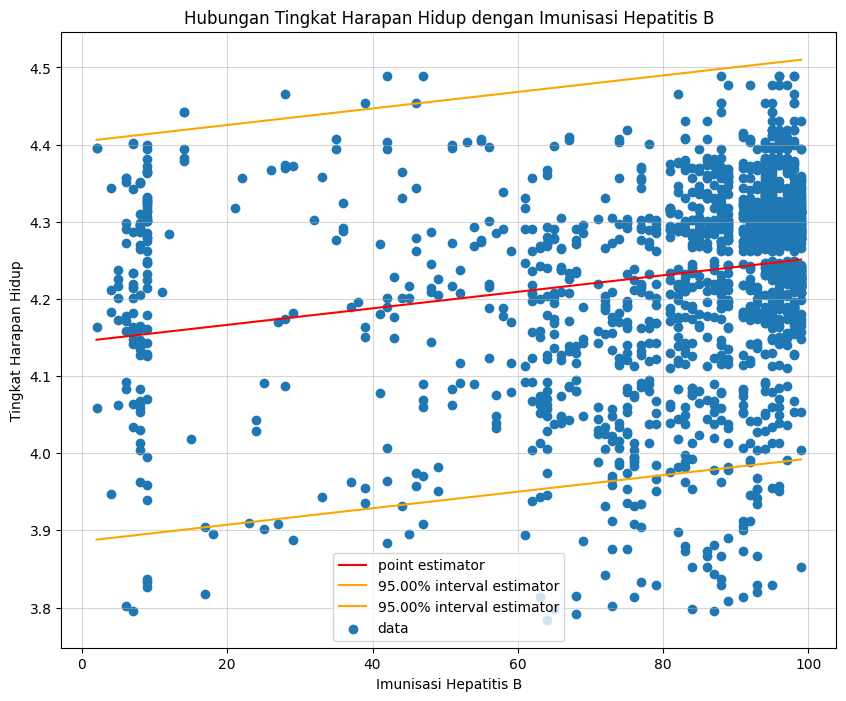

In [477]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Hepatitis B'], y['Life expectancy '], label = "data")

plt.xlabel('Imunisasi Hepatitis B')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup dengan Imunisasi Hepatitis B')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Menggunakan Parameter Terbaik untuk Negara Berkembang dan Negara Maju

#### Negara Berkembang

In [478]:
x = developing_df[['Hepatitis B']]
y = np.log(life_expectancy_developing_df)

developing_hepatitis_list = []

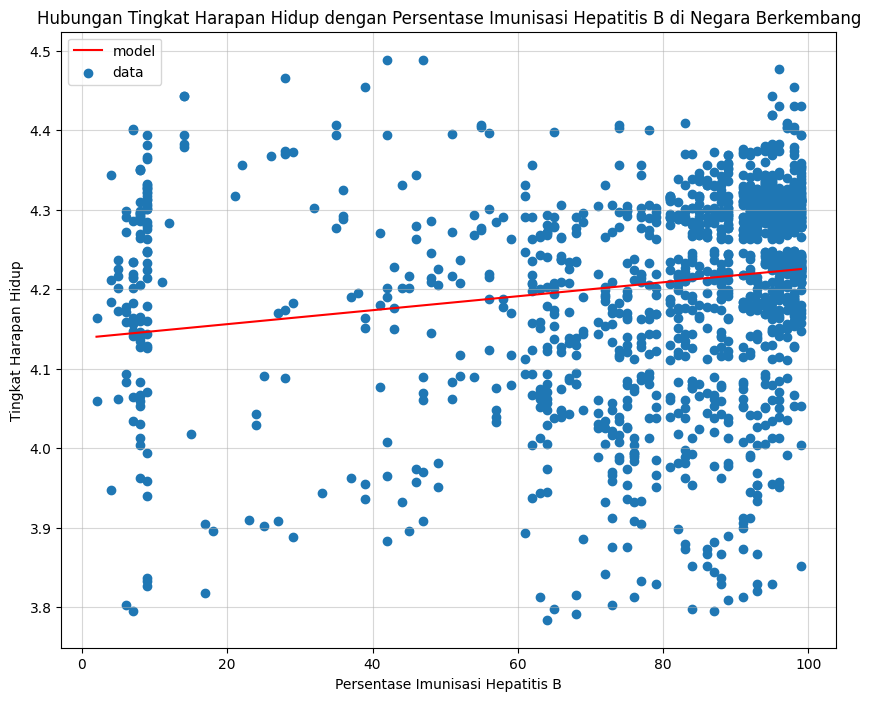

Rataan x 	:  77.728
Rataan y 	:  4.207
Simpangan xx 	:  966760.743
Simpangan xy 	:  848.423
Simpangan yy 	:  24.190

Nilai b0 	:  4.138
Nilai b1 	:  0.001
SSE     	:  23.445
SSR     	:  0.745
SST     	:  24.190

rho     	:  0.175
R2      	:  0.031
MSE     	:  0.017
RMSE    	:  0.129


In [479]:
developing_hepatitis_list = best_param(x, y, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B di Negara Berkembang', developing_hepatitis_list, "Exponential")

In [480]:
b0, b1, RMSE, method, rho = developing_hepatitis_list[0], developing_hepatitis_list[1], developing_hepatitis_list[-2], developing_hepatitis_list[-1], developing_hepatitis_list[5]

### Estimasi Interval untuk data test

In [481]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 55

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  55.000

With confidence level 95.00%,
y_predict 	:  3.934 -  4.440


### Estimasi Interval untuk seluruh nilai data

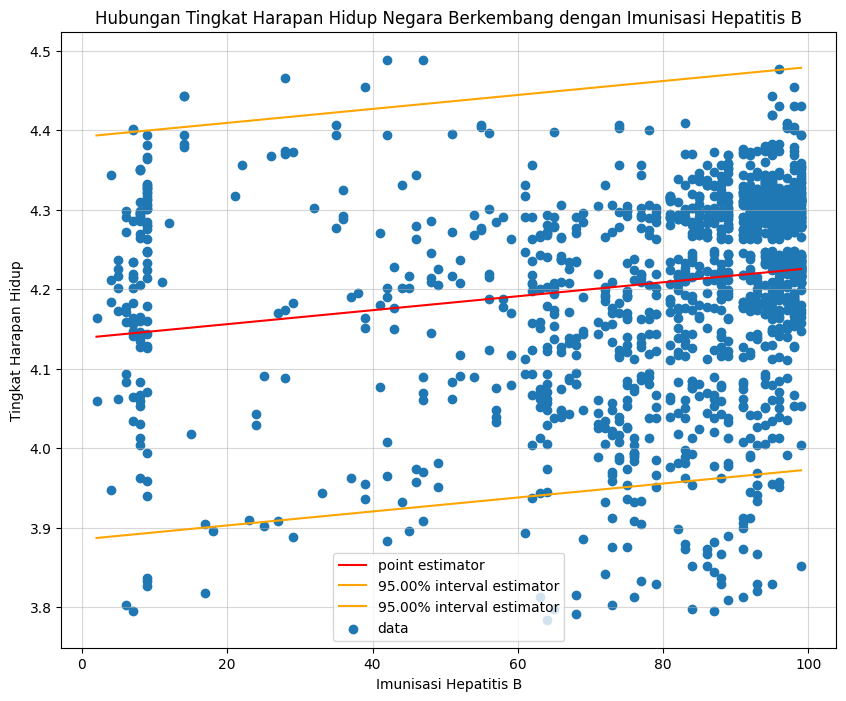

In [482]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Hepatitis B'], y['Life expectancy '], label = "data")

plt.xlabel('Imunisasi Hepatitis B')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Berkembang dengan Imunisasi Hepatitis B')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

#### Negara Maju

In [483]:
x = developed_df[['Hepatitis B']]
y = np.log(life_expectancy_developed_df)

developed_hepatitis_list = []

# REMOVE OUTLIER
# calculate IQR for column Height
Q1 = x['Hepatitis B'].quantile(0.25)
Q3 = x['Hepatitis B'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = x[(x['Hepatitis B'] < Q1 - threshold * IQR) | (x['Hepatitis B'] > Q3 + threshold * IQR)]

# drop rows containing outliers
x = x[['Hepatitis B']].drop(outliers.index)
y = y.drop(outliers.index)

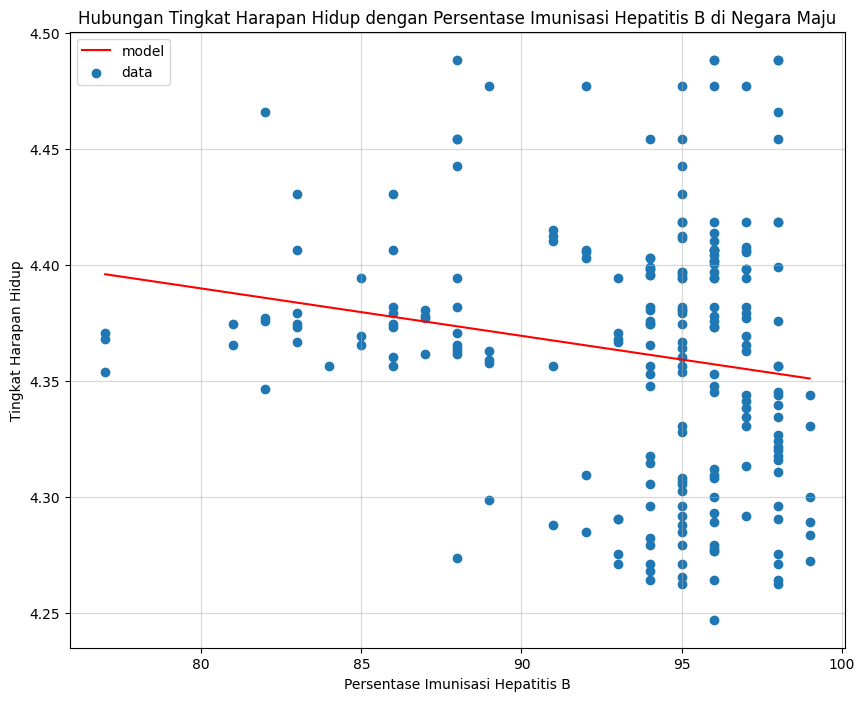

Rataan x 	:  93.355
Rataan y 	:  4.363
Simpangan xx 	:  5052.345
Simpangan xy 	: -10.329
Simpangan yy 	:  0.682

Nilai b0 	:  4.554
Nilai b1 	: -0.002
SSE     	:  0.660
SSR     	:  0.021
SST     	:  0.682

rho     	: -0.176
R2      	:  0.031
MSE     	:  0.003
RMSE    	:  0.055


In [484]:
developed_hepatitis_list = best_param(x, y, 'Hepatitis B', 'Persentase Imunisasi Hepatitis B', 'Persentase Imunisasi Hepatitis B di Negara Maju', developed_hepatitis_list, "Exponential")

In [485]:
b0, b1, RMSE, method, rho = developed_hepatitis_list[0], developed_hepatitis_list[1], developed_hepatitis_list[-2], developed_hepatitis_list[-1], developed_hepatitis_list[5]

### Estimasi Interval untuk data test

In [486]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 90

alpha, sigma_alpha = prediction(x_predict, RMSE, b0, b1)

x_predict 	:  90.000

With confidence level 95.00%,
y_predict 	:  4.262 -  4.477


### Estimasi Interval untuk seluruh nilai data

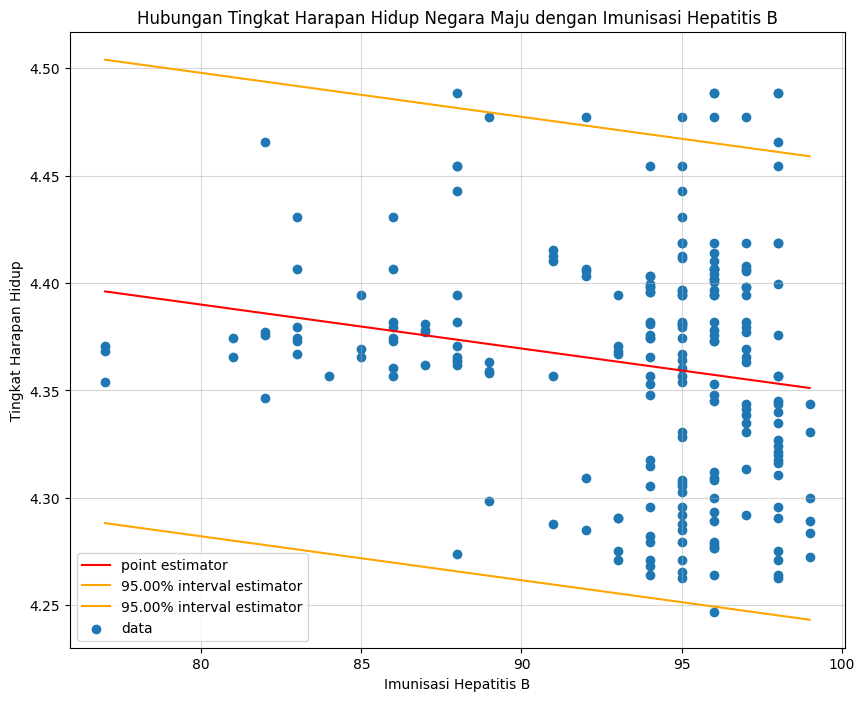

In [487]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x.values), np.max(x.values), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha

fig = plt.figure(figsize =(10, 8))

# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")

# plot data
plt.scatter(x['Hepatitis B'], y['Life expectancy '], label = "data")

plt.xlabel('Imunisasi Hepatitis B')
plt.ylabel('Tingkat Harapan Hidup')
plt.title('Hubungan Tingkat Harapan Hidup Negara Maju dengan Imunisasi Hepatitis B')
plt.grid(alpha=0.5)
plt.legend()
plt.show()